# AcadGild_Capstone_Project_7

#### 1. Domain Introduction 

There has been customer data for the teleccom company which provides many entertainment and communication services like phone, internet , Mobile streaming , TV streaming etc.


#### 2. Problem Statement 

The company is concerned about their customers leaving their landline business for cable competitors and they want to knoe who  is leaving & why.
object is to create and find best model to identify customer behaviour to retain customers.

#### 3. Data Source

Data Source is available at <a href='(https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv?cm_mc_uid=14714377267115403444551&cm_mc_sid_50200000=12578191540344455127&cm_mc_sid_52640000=36692891540344455130)'>[IBM watson analytics page]</a>

#### 4. Data Set description 

This data set provides info to help you predict behavior to retain customers. You can analyze all
relevant customer data and develop focused customer retention programs.

A telecommunications company is concerned about the number of customers leaving their landline
business for cable competitors. They need to understand who is leaving. Imagine that you’re an
analyst at this company and you have to find out who is leaving and why.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method,paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

#### 5. Identifying target fetaure/variable 

The Goal is to predict whether or not a particular customer is likely to retain services. 

This is represented by the Churn column in dataset. Churn=Yes means customer leaves the company, whereas Churn=No implies customer is retained by the company.

#### 6. Reading the DataSet form source path/url


Before reading the dataset from data source , let's collect some important python modules requored for data analysis.

In [1]:
# python modules

import pandas as pd  # for dataframe and other data strture realted opeartions
import numpy as np # for numerical computation
import matplotlib.pyplot  as plt #  for data visualisation
import seaborn as sns #  for data visualisation
# for plotting the graph/data with in Jupyter notebook
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# To prevent depreciation warnings

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
def get_data_from_source(dataset_path):
    '''this function will load data from the source'''    
    df_data = pd.read_csv(dataset_path)
    return df_data

## Apply function and get data 

dataset_path = 'https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv'
#dataset_path ='WA_Fn-UseC_-Telco-Customer-Churn.csv'
df_telecomData = get_data_from_source(dataset_path) # crete datafraame values return by function

# Sample rows from data set
df_telecomData.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


As we can see data set contains features/columns with numerical and categorcal(binary and others ) data and out of that the " customerID " is the unique features which's values get changes for every customer.
So we can re-frame our dataset with making curomerID as Index value.

In [4]:
df_telecomData.set_index('customerID' , inplace=True) # apply inplace if want to make permanent changes on existing dataset
# Sample rows of data set after changing index value
df_telecomData.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#### 7. Inspection Of Data

In [5]:
# function to Get insights of data

def  get_insights_from_dataframe(dataframe):
    '''This function return insights from data set. The function return values in folowing order from dataset
    0-index ,1-columns , 2-datatypes of columns  ,3-shape of data set  '''
    index_values = dataframe.index
    df_columns = dataframe.columns    
    datatypes = dataframe.dtypes
    shape_dataset = dataframe.shape
    return index_values , df_columns , datatypes,shape_dataset
    
    
# Apply function on dataframe 
df_telecomData_insights = get_insights_from_dataframe(df_telecomData)

In [6]:
print("Index values froom dataset")
df_telecomData_insights[0]

Index values froom dataset


Index(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU',
       '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU',
       ...
       '9767-FFLEM', '0639-TSIQW', '8456-QDAVC', '7750-EYXWZ', '2569-WGERO',
       '6840-RESVB', '2234-XADUH', '4801-JZAZL', '8361-LTMKD', '3186-AJIEK'],
      dtype='object', name='customerID', length=7043)

In [7]:
print("Columns form dataset")
df_telecomData_insights[1]

Columns form dataset


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
print("datatypes information about columns in dataset")
df_telecomData_insights[2]

datatypes information about columns in dataset


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
print("Shape (no. of rows and column) of dataset")
df_telecomData_insights[3]


Shape (no. of rows and column) of dataset


(7043, 20)

Thus our data set has 7043 rows and 20 features

#### 8. Data Manipulation

In [10]:
# Check if data set contains null values 
df_telecomData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# get unique values in each column in dataset 

def get_unique_values_for_stringtype_Data(df):
    '''this function will display string /categorical type data from dataset'''
    # np.object is numpy variable to detect string/object type data
    for col in df.select_dtypes(include=[np.object]).columns: 
        print(col , " :" , df[col].unique(),"\n")
        
        
# Applu dataframe on function
print('Columns with unique values\n')
get_unique_values_for_stringtype_Data(df_telecomData)

Columns with unique values

gender  : ['Female' 'Male'] 

Partner  : ['Yes' 'No'] 

Dependents  : ['No' 'Yes'] 

PhoneService  : ['No' 'Yes'] 

MultipleLines  : ['No phone service' 'No' 'Yes'] 

InternetService  : ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity  : ['No' 'Yes' 'No internet service'] 

OnlineBackup  : ['Yes' 'No' 'No internet service'] 

DeviceProtection  : ['No' 'Yes' 'No internet service'] 

TechSupport  : ['No' 'Yes' 'No internet service'] 

StreamingTV  : ['No' 'Yes' 'No internet service'] 

StreamingMovies  : ['No' 'Yes' 'No internet service'] 

Contract  : ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling  : ['Yes' 'No'] 

PaymentMethod  : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

TotalCharges  : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] 

Churn  : ['No' 'Yes'] 



In [12]:
# Check if dataset contains duplicate values 
df_telecomData.duplicated().all()

False

In [13]:
df_telecomData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [14]:
df_telecomData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


As seen in dataset " Total Charges " contains numerical but it's datatype is object type. hence it needs to be convert into numerical.

In [15]:
# We need to convert the Total Charges from object type to Numeric
df_telecomData['TotalCharges'] = df_telecomData['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df_telecomData['TotalCharges'] = pd.to_numeric(df_telecomData['TotalCharges'])
df_telecomData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [16]:
# Check null values in dataframe 
print(" datatype of TotalCharge :" , df_telecomData.TotalCharges.dtype)
df_telecomData.isna().sum()

 datatype of TotalCharge : float64


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As seen " Total Chanrges " contains missing values and now "TotalCharge" is it of float64 type. thus those missing values may get raplce with the mean of TotalCharge

In [17]:
df_telecomData['TotalCharges'] = df_telecomData['TotalCharges'].fillna((df_telecomData['TotalCharges'].mean()))
# 
df_telecomData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


#### 9. Basline Accuracy

Our object is to identify the count of customer who are leaving the subscription from the telecom company or who are reating with them based upon " Churn " column. Thus let's form baseline accuracy based upon existing data

In [18]:
# Baseline accuracy

df_telecomData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [19]:
df_telecomData['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

#### 10. Exploratory Data Analysis

Based upon above opted baseline accuracy we can predict that  73 % ( 5174 cutomers out of 7043) has decided to retain the subscription with company. Rest has decided to quit.

In [20]:
# Statitistical Analysis of dataset

df_telecomData.describe()  # return information about fetaures with numerical data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
# Statitistical Analysis of dataset with object type feature 
df_telecomData.describe(include=np.object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


#### 10.1 Univariate Analysis

In [22]:
# Create function to get graphical analysis of data

def get_visualize_data( df, col_to_exclude, object_mode = True ):
    """ 
     This function plots the count or distribution of each column in the dataframe based on specified inputs
     @Args
       df: pandas dataframe
       col_to_exclude: specific column to exclude from the plot, used for excluded key 
       object_mode: whether to plot on object data types or not (default: True)
       
     Return
       No object returned but visualized plot will return based on specified inputs
    """
    
    num = 0
    cols_add = []
    
    # temp vairbale for object cols to add or not
    if object_mode :
        nrows = 4
        ncols = 4
        width =20
        height= 20
    else:
        nrows = 2
        ncols = 2
        width = 15
        height= 10
    
    for col in df.columns:
        if object_mode:
            if (df[col].dtypes == 'O') & (col != col_to_exclude):
                cols_add.append(col)
        
        else:
            if (df[col].dtypes != 'O'):
                cols_add.append(col)
                
    # graph 
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    
    for row in range(nrows):
        for column in range(ncols):
            if object_mode:
                graph = sns.countplot(df[cols_add[num]], ax=ax[row][column])
            else:
                graph = sns.distplot(df[cols_add[num]], ax = ax[row][column])
                
            ax[row, column].set_title("Column name: {}".format(cols_add[num]))
            ax[row, column].set_xlabel("")
            ax[row, column].set_ylabel("")
            num += 1
    plt.xticks(rotation=75)
    plt.show();
    return None  
        
        

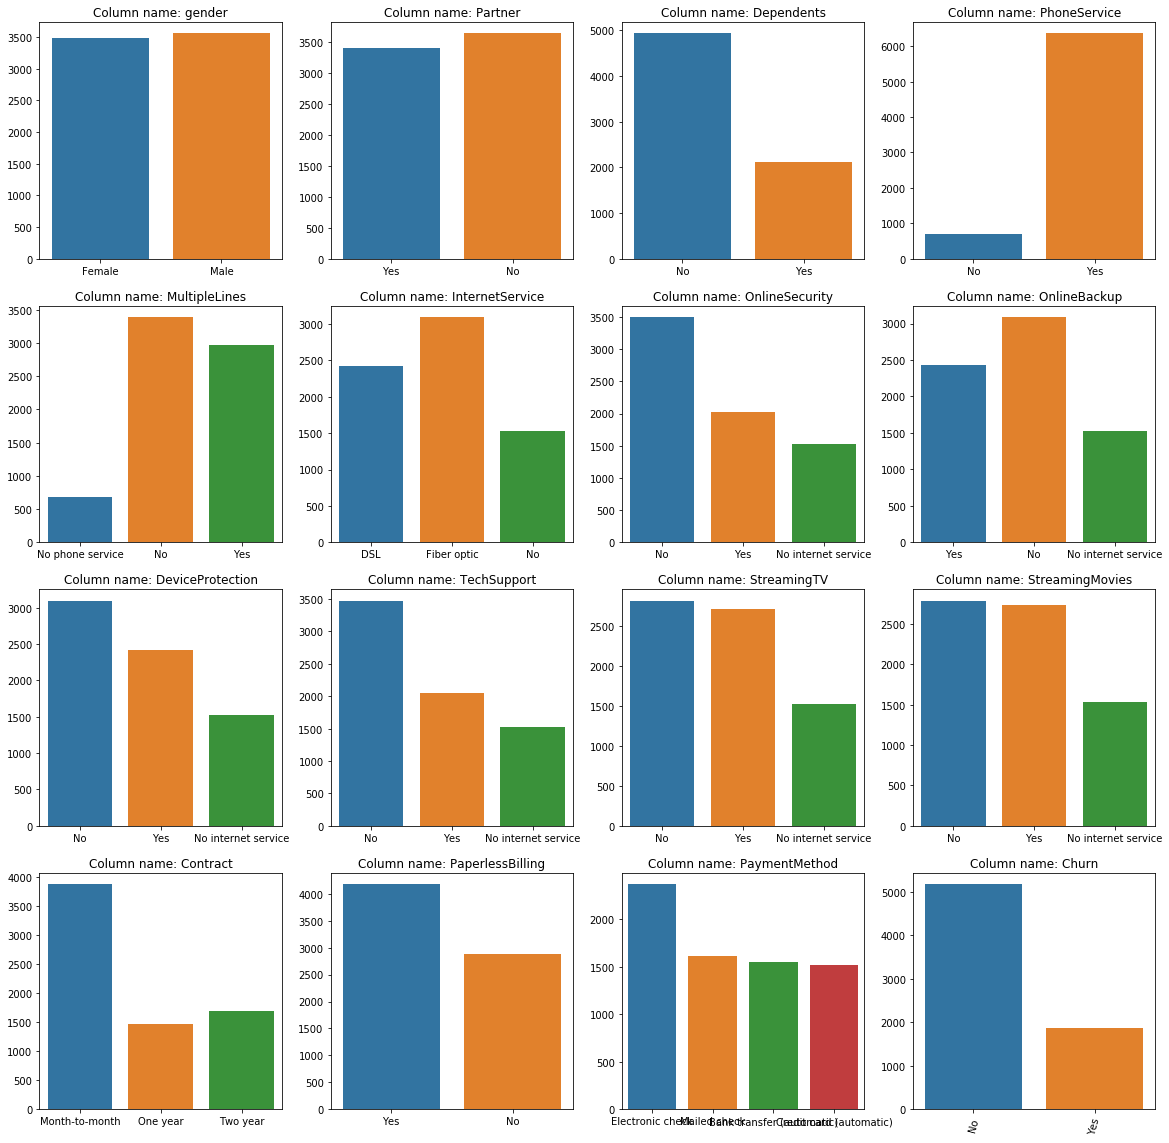

In [23]:
# get visualisation of dat with including object type data

get_visualize_data(df_telecomData, 'customerid', object_mode = True)

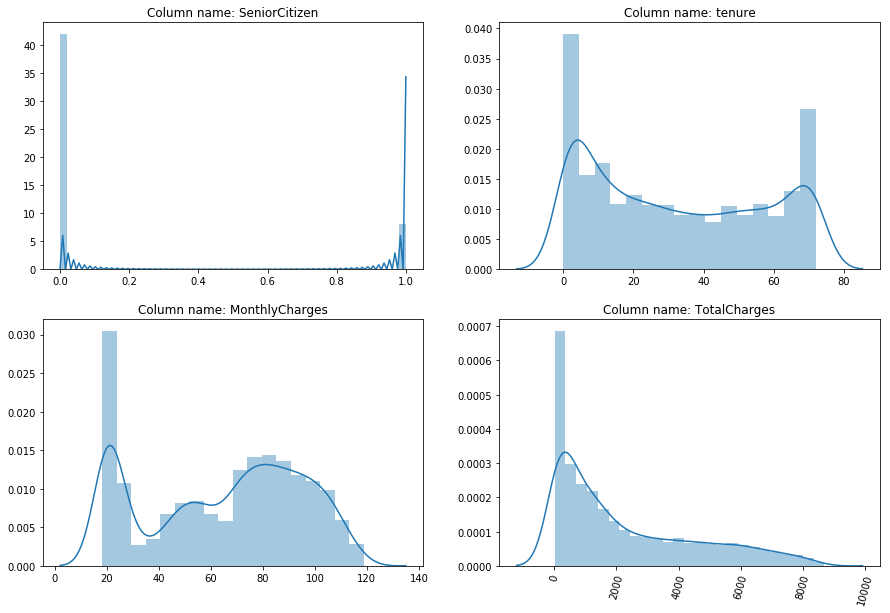

In [24]:
# get visualisation of dat with excluding object type data

get_visualize_data(df_telecomData, 'customerid', object_mode = False)

#### 10.2 Feature Engineering

In [25]:
df_telecomData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In this section , we do analysis between features of dataset as wether customer churn the subscriptioon or not , it's based upon services provided by company and other features related to them.

In [26]:
def get_cross_realtionship_between_features ( df , feature_a , feature_b):
    '''This function returns cross relationship between features'''
    df_temp = pd.crosstab(index=df[feature_a] ,columns= df[feature_b] , margins=True)
    df_temp.plot(kind='bar',figsize=(7,5))
    plt.show()
    return df_temp

**a . Gender vs Churn**
Identify which category of gender churn the subscription



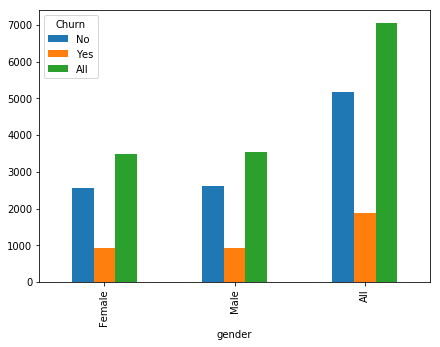

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


In [27]:
get_cross_realtionship_between_features(df= df_telecomData , feature_a='gender' , feature_b='Churn')

**b . Partner vs Churn**
Identify wether Customer with Partners, churn the subscription

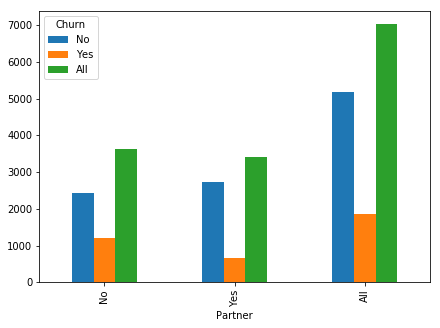

Churn,No,Yes,All
Partner,,,
No,2441,1200,3641
Yes,2733,669,3402
All,5174,1869,7043


In [28]:
get_cross_realtionship_between_features(df= df_telecomData , feature_a='Partner' , feature_b='Churn')

**c . Dependents vs Churn**
Identify wether Customer with Dependents, churn the subscription

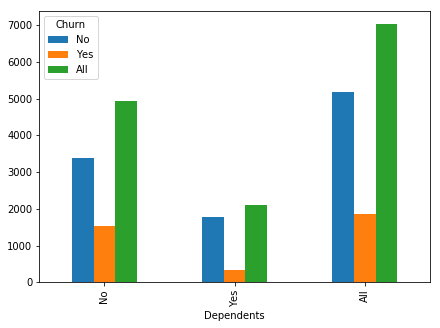

Churn,No,Yes,All
Dependents,,,
No,3390,1543,4933
Yes,1784,326,2110
All,5174,1869,7043


In [29]:
get_cross_realtionship_between_features(df= df_telecomData , feature_a='Dependents' , feature_b='Churn')

**d . PhoneServices vs MultipleLines**
 - If the subscribers have phone service, they may have multiple lines (yes or no). 
 - But if the subscribers don't have phone service, the subscribers will never have multiple lines.

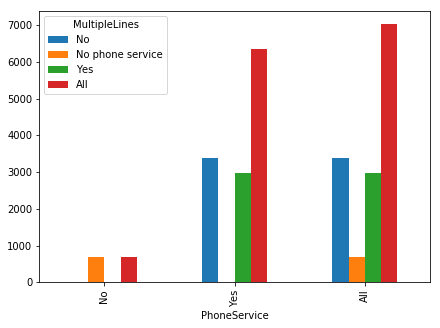

MultipleLines,No,No phone service,Yes,All
PhoneService,,,,
No,0,682,0,682
Yes,3390,0,2971,6361
All,3390,682,2971,7043


In [30]:
get_cross_realtionship_between_features(df=df_telecomData , feature_a='PhoneService' , feature_b='MultipleLines')

**e . InternetServices vs MultipleLines**
 - If the subscribers have Internet service, they may have multiple lines (yes or no). 
 - But if the subscribers don't have Internet service, the subscribers will may or may not have multiple lines.

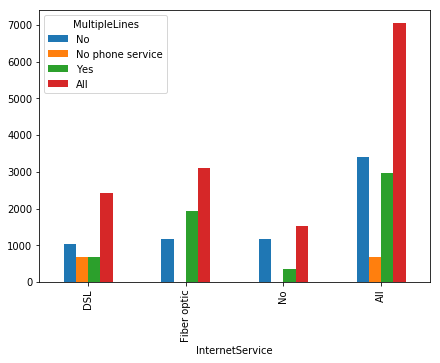

MultipleLines,No,No phone service,Yes,All
InternetService,,,,
DSL,1048,682,691,2421
Fiber optic,1158,0,1938,3096
No,1184,0,342,1526
All,3390,682,2971,7043


In [31]:
get_cross_realtionship_between_features(df=df_telecomData , feature_a='InternetService' , feature_b='MultipleLines')

As seen in dataset , various features contains muliplt No Values like No , NO Phone/internet Service. In context it is similar to No because customer is lacking a service and as alternative they using another service either phone or internet service.

In [32]:
# Function to transfrom No Service

def transform_no_service (dataframe):
    '''This Function will transfrom features with multiple no values to single No value based upon dataset'''
    columns_to_transform = []
    for col in dataframe.columns:
        if (dataframe[col].dtype == 'O'):
            if len(dataframe[dataframe[col].str.contains("No")][col].unique())>1 :
                columns_to_transform.append(col)
            
    print("Total column(s) to transform: {}".format(columns_to_transform))
    for col in columns_to_transform:
        dataframe.loc[dataframe[col].str.contains("No"), col] = 'No'
        
    return dataframe


# Apply  function on dataframe

df_telecomData = transform_no_service(df_telecomData)

print(" Unique values in features after transforming values")
get_unique_values_for_stringtype_Data(df_telecomData)

Total column(s) to transform: ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
 Unique values in features after transforming values
gender  : ['Female' 'Male'] 

Partner  : ['Yes' 'No'] 

Dependents  : ['No' 'Yes'] 

PhoneService  : ['No' 'Yes'] 

MultipleLines  : ['No' 'Yes'] 

InternetService  : ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity  : ['No' 'Yes'] 

OnlineBackup  : ['Yes' 'No'] 

DeviceProtection  : ['No' 'Yes'] 

TechSupport  : ['No' 'Yes'] 

StreamingTV  : ['No' 'Yes'] 

StreamingMovies  : ['No' 'Yes'] 

Contract  : ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling  : ['Yes' 'No'] 

PaymentMethod  : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

Churn  : ['No' 'Yes'] 



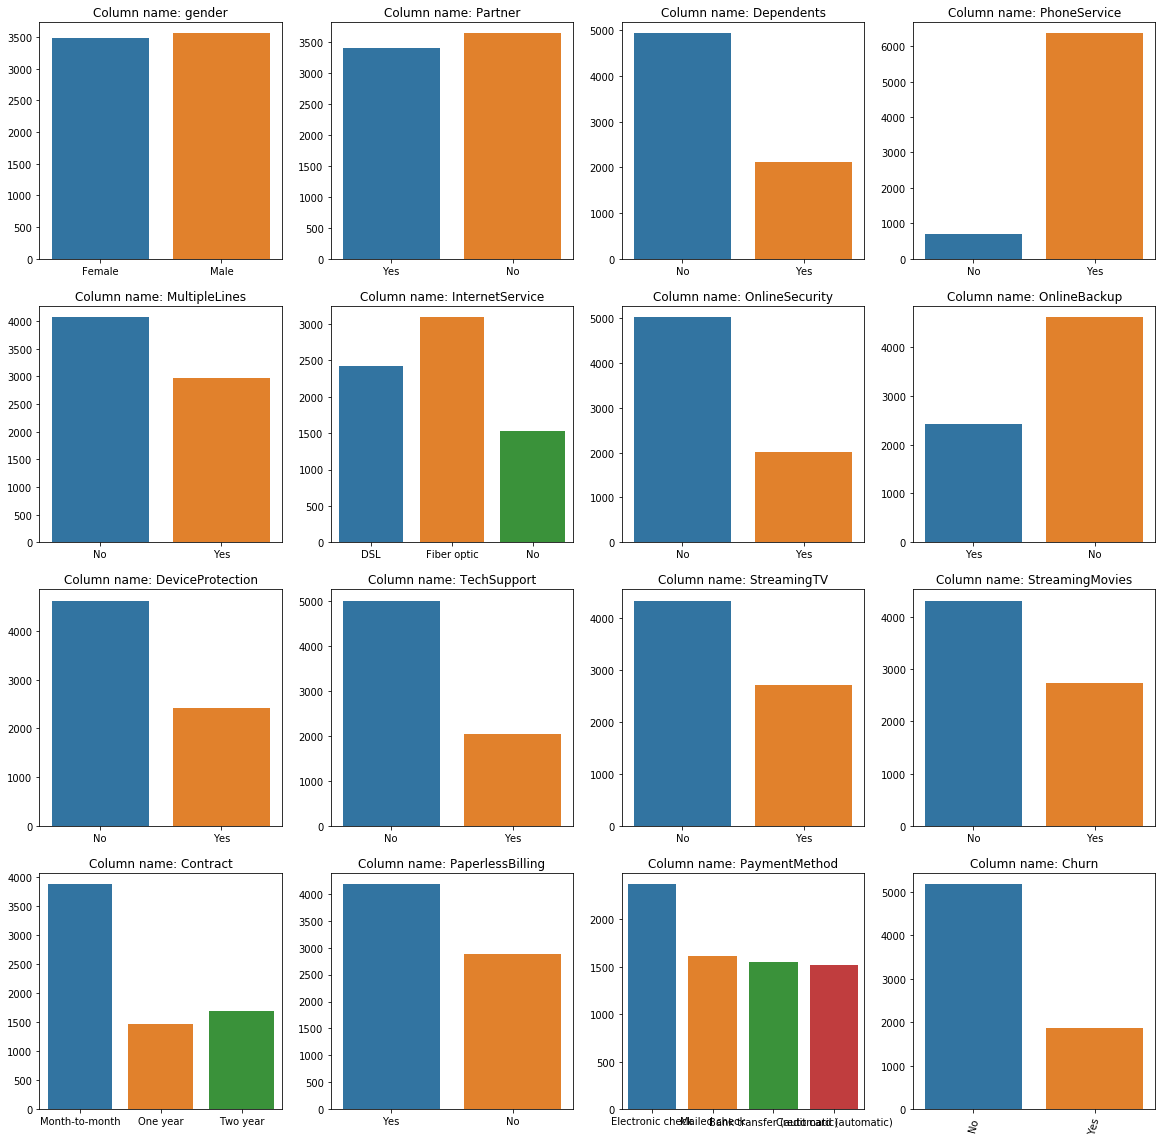

In [33]:
# data visualisation after transforming values

get_visualize_data(df_telecomData, 'customerid', object_mode = True)

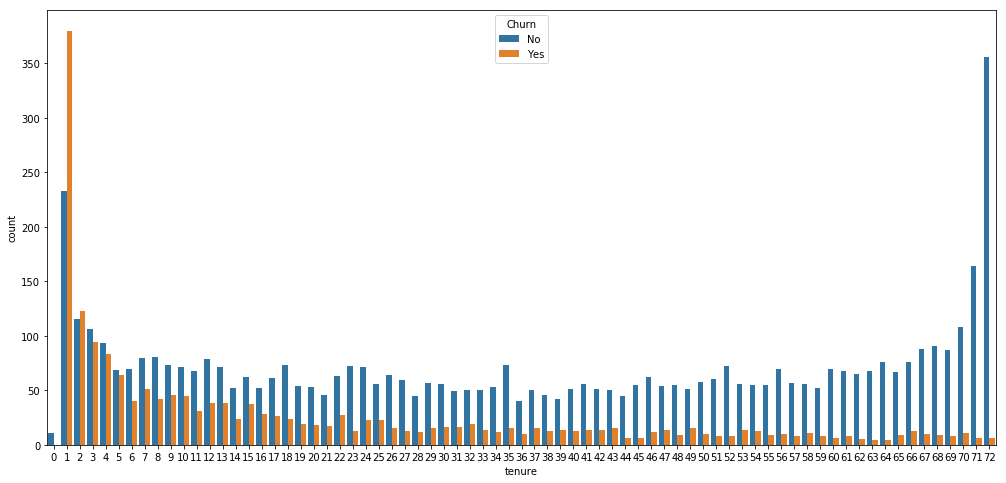

In [34]:
# relationShip between tenure and 
plt.figure(figsize=(17,8))
sns.countplot(x=df_telecomData['tenure'],hue=df_telecomData.Churn);

#### 10.3 Correlation between features



Correlation values between features 
                 SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102395
tenure               0.016567  1.000000        0.247900      0.824757
MonthlyCharges       0.220173  0.247900        1.000000      0.650468
TotalCharges         0.102395  0.824757        0.650468      1.000000


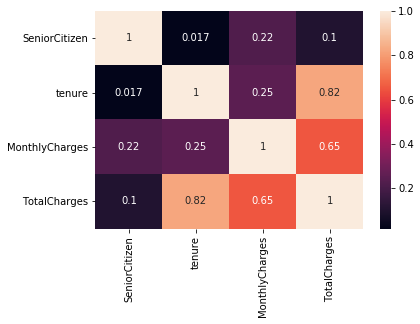

In [35]:
# Function to get correlation between features

def correlation_between_features(dataframe):
    ''' This function returns correlation between features from dataframe'''
    print("Correlation values between features \n",dataframe.corr())
    sns.heatmap(dataframe.corr(),xticklabels=dataframe.corr().columns.values,yticklabels=dataframe.corr().columns.values,annot=True);
    plt.show()

    
# Apply dataframe on function

correlation_between_features(df_telecomData)

    

As seen Correlation between tenure and Total Charges is much higher. Similar is the case with Monthly charges and Total Charges.

The reason may be presumablw as calulation of **Total Charges ~ Monthly Charges * Tenure + Additional Charges(Tax).**

As seen in dataset  , tenure is contaning  linear range as values which may transform into group to seperate them in classification.


In [36]:
#Tenure to categorical column
def tenure_lab(telcom) :
    ''' This function cretaes catgorical values based upon range of values'''
   
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
    
# Create new feature in dataframe based on tenure   
df_telecomData["tenure_group"] = df_telecomData.apply(lambda x:tenure_lab(x),axis = 1)

In [37]:
# Sample rows after adding new column/feature
df_telecomData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


#### 11 . Data Preprocessing

##### 11.1 Encoding categorical variable

As seen in dataset " SenoirCitizon " only two unique values , 0 and 1 . Thus Encoding it into boolean may help to understand data better.


In [38]:
df_telecomData['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [39]:
df_telecomData['SeniorCitizen'] = df_telecomData['SeniorCitizen'].replace({0:"No" , 1 : "Yes"})

In [40]:
# unqiue data in dataset after encoding
get_unique_values_for_stringtype_Data(df_telecomData)

gender  : ['Female' 'Male'] 

SeniorCitizen  : ['No' 'Yes'] 

Partner  : ['Yes' 'No'] 

Dependents  : ['No' 'Yes'] 

PhoneService  : ['No' 'Yes'] 

MultipleLines  : ['No' 'Yes'] 

InternetService  : ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity  : ['No' 'Yes'] 

OnlineBackup  : ['Yes' 'No'] 

DeviceProtection  : ['No' 'Yes'] 

TechSupport  : ['No' 'Yes'] 

StreamingTV  : ['No' 'Yes'] 

StreamingMovies  : ['No' 'Yes'] 

Contract  : ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling  : ['Yes' 'No'] 

PaymentMethod  : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

Churn  : ['No' 'Yes'] 

tenure_group  : ['Tenure_0-12' 'Tenure_24-48' 'Tenure_12-24' 'Tenure_gt_60' 'Tenure_48-60'] 



In [41]:
# Selection of encoding method for data preprocessing
from sklearn.preprocessing import LabelEncoder , StandardScaler


As we know our dataset contains multiple type of columns including int, float and object. Thus before processing seperating them into individual group may ease preprocessing step.

In [42]:
# Columns in dataset
df_telecomData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [43]:
# We already know that Churn is our target variable

target_col = ['Churn']


#categorical columns   df_telecomData.nunique() return number of unique values in features in dataset
catg_cols   = df_telecomData.nunique()[df_telecomData.nunique() < 6].keys().tolist()

#Selection of colum with category
catg_col = [ x for x in catg_cols if x not in target_col]

# Columns with numerical data
number_col = [x for x in df_telecomData.columns if x not in  catg_col + target_col]

# Selection of columns with two classes 
binary_col = df_telecomData.nunique()[df_telecomData.nunique() ==2].keys().tolist()

#Columns more than 2 classes
multi_cols = [x for x in catg_cols if x not in binary_col]


print("Columns with  2 classes :" ,binary_col)
print('-'*80)
print("Columns with more than 2 classes :" ,multi_cols)
print('-'*80)
print("Number columns :" , number_col)


Columns with  2 classes : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
--------------------------------------------------------------------------------
Columns with more than 2 classes : ['InternetService', 'Contract', 'PaymentMethod', 'tenure_group']
--------------------------------------------------------------------------------
Number columns : ['tenure', 'MonthlyCharges', 'TotalCharges']


In [44]:
# Lable encoding on binary columns 
le = LabelEncoder()
#Apply encoding on binary columns
for col in binary_col:
    df_telecomData[col] = le.fit_transform(df_telecomData[col])
    
    
# Creating dummy variable form columns with morethan trwo classes 
df_telecomData = pd.get_dummies(data = df_telecomData,columns = multi_cols )


# Sample rows from dataset after label encoding and dummy variable adding

df_telecomData.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
5575-GNVDE,1,0,0,0,34,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0


In [45]:
# Columns in data set after label encoding
df_telecomData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_Tenure_0-12', 'tenure_group_Tenure_12-24',
       'tenure_group_Tenure_24-48', 'tenure_group_Tenure_48-60',
       'tenure_group_Tenure_gt_60'],
      dtype='object')

##### 11.2 Normalizing Features

As seen in dataset, it contains some numerical data( other than 0 & 1). The data have un-even distribution , which may hamper analysis while building the model. Thus Normalizing it may solve our problem.

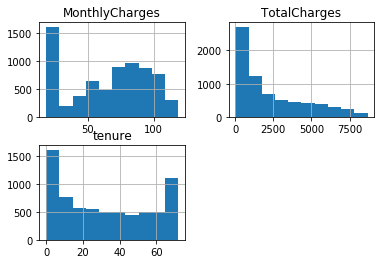

In [46]:
# Select numerical data from dataset - hist() distribution
df_telecomData[number_col].hist()
plt.show()

In [47]:
# Calling Statndard scalar method for preprocessing

std = StandardScaler()
# Apply scaling on dataframe with numerical columns
scaled_data = std.fit_transform(df_telecomData[number_col])
scaled_data = pd.DataFrame(scaled_data,columns=number_col)
# Sample rows from scaled data
scaled_data.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994971
1,0.066327,-0.259629,-0.173876
2,-1.236724,-0.362660,-0.960399
3,0.514251,-0.746535,-0.195400
4,-1.236724,0.197365,-0.941193


In [48]:
# Drop existing numerical features from dataset
print(" Shape of dataset before dropping the features ", df_telecomData.shape)

df_telecomData.drop( columns= number_col , axis=1 , inplace=True ) # axis =1 for performing operation on columns
print(" Shape of dataset after dropping the features ", df_telecomData.shape)

 Shape of dataset before dropping the features  (7043, 32)
 Shape of dataset after dropping the features  (7043, 29)


In [49]:
df_telecomData.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
5575-GNVDE,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3668-QPYBK,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,0
7795-CFOCW,1,0,0,0,0,0,1,0,1,1,...,0,1,0,0,0,0,0,1,0,0
9237-HQITU,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [50]:
# apply scaled features on dataset
df_telecomData.reset_index(drop=False, inplace=True)

df_telecomData = pd.concat([df_telecomData, scaled_data], axis=1)

df_telecomData.set_index('customerID', inplace=True)

df_telecomData.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.277445,-1.160323,-0.994971
5575-GNVDE,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0.066327,-0.259629,-0.173876
3668-QPYBK,1,0,0,0,1,0,1,1,0,0,...,0,1,1,0,0,0,0,-1.236724,-0.362660,-0.960399
7795-CFOCW,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.514251,-0.746535,-0.195400
9237-HQITU,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,-1.236724,0.197365,-0.941193


#### 11.3 Split the data into train and test Set



In [51]:
# Calling sklearn.model_selection for splitting data into train and test
from sklearn.model_selection import train_test_split

In [52]:
# Seprating dataset bet ween dependent and indepndent features

dep_feature = ["Churn"]
indep_feature = [ x for x in df_telecomData.columns if x not in dep_feature ]

X = df_telecomData[indep_feature]
y= df_telecomData[dep_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100 , shuffle=True)

print(" Shape of train set ( feature):",X_train.shape)
print(" Shape of train set ( target):",y_train.shape)
print("\n")
print(" Shape of test set ( feature):",X_test.shape)
print(" Shape of test set ( target):",y_test.shape)

 Shape of train set ( feature): (4718, 31)
 Shape of train set ( target): (4718, 1)


 Shape of test set ( feature): (2325, 31)
 Shape of test set ( target): (2325, 1)


#### 12  . Model Building 

In [53]:
# Loading required librarires for machine lerning model building

# dummy classifier 
from sklearn.dummy import DummyClassifier
# Classification Models
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# model evaluation
from sklearn.metrics import confusion_matrix , classification_report ,  precision_recall_fscore_support
from sklearn.metrics import f1_score , accuracy_score , precision_score , recall_score , roc_auc_score ,log_loss 
from sklearn.metrics import roc_curve ,auc , precision_recall_curve

# Model validation
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

# Utilies 

import time
import io, os, sys, types, time, datetime, math, random

#### 12.1 Model evaluation function

In [54]:
# (A ) Function for model fit using training dataset
    
def model_fitting(ml_algo,feature_variable_train,target_variable_train,cross_validation):
    ''' This function fit's the model and  returns  prdicted values from feature variable based on model.
    Following classifier used for model prediction LogisticRegression , DecisionTreeClassifier,
                              RandomForestClassifier , GradientBoostingClassifier,
                              XGBClassifier , KNeighborsClassifier , GaussianNB'''
    # Model fitting
    ml_model = ml_algo.fit(feature_variable_train, target_variable_train)
       
    if (isinstance(ml_algo , (LogisticRegression , DecisionTreeClassifier,
                              RandomForestClassifier , GradientBoostingClassifier,
                              XGBClassifier , KNeighborsClassifier , GaussianNB))):
        model_pred_prob = ml_model.predict_proba(feature_variable_train)[:,1]
    else:
        model_pred_prob = "Not available"
    acc_score_train = round(ml_model.score(feature_variable_train, target_variable_train) * 100, 2) 
    # Cross Validation
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import accuracy_score
    
    pred_val_train = cross_val_predict(ml_algo,feature_variable_train,target_variable_train, cv=cross_validation, n_jobs = -1)
    acc_cv = round(accuracy_score(target_variable_train, pred_val_train) * 100, 2)
    
    return ml_model, pred_val_train , model_pred_prob , acc_score_train , acc_cv

#----------------------------------------------------------------------------------------------------------------#


# (B) Function to predict target variable based on test features and ml_model


def predict_target(feature_variable_test , ml_model):
    '''This function return predicted tartget variable based on model'''
    pred_test = ml_model.predict(feature_variable_test)
    pred_test_prob = ml_model.predict_proba(feature_variable_test)[:,1]
    return pred_test , pred_test_prob

#----------------------------------------------------------------------------------------------------------------#

# (C) Function for model evalution score

def get_model_evaluation_scores(actual_target_variable , predicted_target_variable):
    '''This function return model evaluation scores . The function return values in following order accuracy_score ,\
    precision_score , recall_score ,f1_score , roc_auc_score ,log_loss'''
    from sklearn.metrics import  accuracy_score , precision_score , recall_score ,f1_score , roc_auc_score ,log_loss 
    
    accu_score = accuracy_score(y_true= actual_target_variable , y_pred= predicted_target_variable )
    precision_score = precision_score(y_true= actual_target_variable , y_pred= predicted_target_variable )
    recall_score = recall_score(y_true= actual_target_variable , y_pred= predicted_target_variable )
    f1_score = f1_score( y_true= actual_target_variable , y_pred=predicted_target_variable )
    roc_auc_score = roc_auc_score(y_true= actual_target_variable , y_score= predicted_target_variable )
    log_loss_score = log_loss( y_true= actual_target_variable , y_pred= predicted_target_variable)
    
    return accu_score , precision_score , recall_score , f1_score , roc_auc_score ,log_loss_score

#----------------------------------------------------------------------------------------------------------------#

# (D) Function for Confusion matrix

def get_visual_confusion_matrix(actual_target_variable , predicted_target_variable):
    '''This function returns the visual representaion of Confusion matix'''
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    matrix = confusion_matrix(y_true= actual_target_variable , y_pred= predicted_target_variable )
    confusion_matrix_graph = pd.DataFrame(matrix, range(2), range(2))
    sns.set(font_scale=0.9)#for label size    
    graph = sns.heatmap(confusion_matrix_graph, annot=True, annot_kws={"size": 25}, 
                fmt='.4g',xticklabels=['Pred : False(NO:0)','Pred : True(Yes:1)'], 
                yticklabels=['Actual : False(NO:0)','Actual : True(Yes:1)'])
    plt.show()
    return graph

#----------------------------------------------------------------------------------------------------------------#

# ( E) unction for classification report
def get_classification_report(actual_target_variable,predicted_target_variable):
    '''This function will return classification report based upon actual and predicted target variable'''
    from sklearn.metrics import classification_report
    report = classification_report(y_true=actual_target_variable , y_pred=predicted_target_variable ,\
                                   target_names=['No :0' , 'Yes:1'])
    return report

#----------------------------------------------------------------------------------------------------------------#

# (F ) Function for plotting ROC-AUC curve

def plot_roc_auc_curve(actual_target_variable , predicted_target_variable):
    '''This function returns graph between model's roc and auc score '''
    from sklearn.metrics import roc_curve , auc
    import matplotlib.pyplot as plt
    fpr , tpr, threshold = roc_curve(y_true= actual_target_variable , y_score= predicted_target_variable)
    auc_score = auc(x=fpr,y=tpr )
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_score)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#----------------------------------------------------------------------------------------------------------------#
    
#  ( G) Function for plotting Precision-Recall curve 

def plot_precision_recall_curve(actual_target_variable , predicted_target_variable):
    '''This function returns precision-recall curve for model '''
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    precision , recall , threshold = precision_recall_curve(y_true= actual_target_variable ,\
                                                            probas_pred=predicted_target_variable)
    
    closest_zero = np.argmin(np.abs(threshold))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o' , markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.title('Precision-Recall curve for Test dataset', fontsize=16)
    plt.show()
    
    
# (H ) Function foe=r float value
def float_value(x):
    '''This function return float values till 2 decimal places'''
    return round((x*100),2)
    

#### 12.2 Basline Accuracy with dummy classifier




In [55]:
# Convert Traget variable from dataframe  to 1-D array

# training Test variable
y_train = np.ravel(y_train)
# target Test variable
y_test = np.ravel(y_test)

# Training Variable
print( "Training data - shape : Feature variable  'X_train'{0},\t Target variable 'y_train' {1}"\
      .format(X_train.shape ,y_train.shape )) 

# test variable
print( "Test data - shape : Feature variable  'X_test' {0},\t Target variable 'y_test' {1}"\
      .format(X_test.shape ,y_test.shape )) 


Training data - shape : Feature variable  'X_train'(4718, 31),	 Target variable 'y_train' (4718,)
Test data - shape : Feature variable  'X_test' (2325, 31),	 Target variable 'y_test' (2325,)


* ML-Model : DummyClassifier(constant=None, random_state=0, strategy='most_frequent')
* Accuracy (on training set): 73.61
* Accuracy CV 10-Fold(on training set): 73.61
* Running Time: 0:00:09.536563


* Dummy ClassifierModel Evaluation  (test set)

* Dummy Classifier evaluation score (on test set)
	Accuracy Score: 0.7316129032258064
	Precision Score: 0.0       
	Recall Score: 0.0
	F1_score: 0.0
	ROC_AUC_score: 0.5
	Log_Loss_Score: 9.269761922763125  


* Dummy classifier  -Classification Report (on test set)
               precision    recall  f1-score   support

       No :0       0.73      1.00      0.85      1701
       Yes:1       0.00      0.00      0.00       624

   micro avg       0.73      0.73      0.73      2325
   macro avg       0.37      0.50      0.42      2325
weighted avg       0.54      0.73      0.62      2325



* Dummy classifier -Confusion matrix (test set)



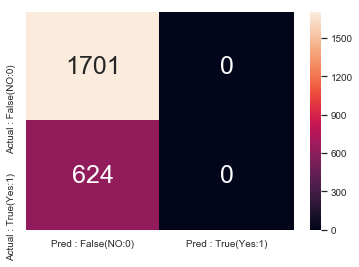



* ROC-AUC curve on Dummy classifier b/w actual target and Predicted probabilities 



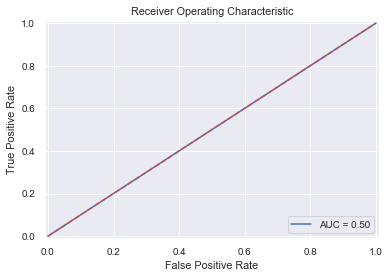

In [56]:
# Apply training data into dummy classifier

dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)

# Apply training's feature and target variable
start_time = time.time() # Start timer before model fitting
dummy_model = model_fitting(ml_algo= dummy_clf , feature_variable_train= X_train ,\
                            target_variable_train= y_train , cross_validation= 10 )
dummy_time = (time.time() - start_time)

print("* ML-Model :", dummy_model[0])
print("* Accuracy (on training set): %s" % dummy_model[3])
print("* Accuracy CV 10-Fold(on training set): %s" % dummy_model[4])
print("* Running Time: %s" % datetime.timedelta(seconds=dummy_time))

# Predict Target variable (test set)
# Apply values on function " predict_target "
pred_test_dummy , pred_test_prob_dummy = predict_target(feature_variable_test= X_test , ml_model= dummy_model[0])
print("\n")

print("* Dummy ClassifierModel Evaluation  (test set)\n")
dummy_model_score = get_model_evaluation_scores(actual_target_variable= y_test ,\
                                                predicted_target_variable= pred_test_dummy)
print("* Dummy Classifier evaluation score (on test set)\n\tAccuracy Score: {0}\n\tPrecision Score: {1}\
       \n\tRecall Score: {2}\n\tF1_score: {3}\n\tROC_AUC_score: {4}\n\tLog_Loss_Score: {5}  ".format(
    dummy_model_score[0], dummy_model_score[1], dummy_model_score[2],\
    dummy_model_score[3],dummy_model_score[4],dummy_model_score[5]))

# Model Classification report (test set)
print("\n")
# Apply values on function " get_classification_report "
print("* Dummy classifier  -Classification Report (on test set)\n",get_classification_report(actual_target_variable= y_test ,\
                                             predicted_target_variable= pred_test_dummy))
print("\n")

# Model's Confusion matrix (test set)
# Apply values on function " get_visual_confusion_matrix "
print("* Dummy classifier -Confusion matrix (test set)\n")
get_visual_confusion_matrix(actual_target_variable= y_test ,predicted_target_variable= pred_test_dummy)
print("\n")

# Model's ROC-AUC curve
# Apply values on function " plot_roc_auc_curve " with actual target and predicted probabilities

print("* ROC-AUC curve on Dummy classifier b/w actual target and Predicted probabilities \n")
plot_roc_auc_curve (actual_target_variable= y_test ,predicted_target_variable= pred_test_prob_dummy)

#### 12.3 Selection of Best Classification Model and their Hyper-parameter

Machine Lerning classifier provides many classification algorithms. Few of them are LogisticRegression , DecisionTreeClassifier, RandomForestClassifier , GradientBoostingClassifier,  XGBClassifier , KNeighborsClassifier , GaussianNB

In order to predict classification accuracy from model  it is required to train the model with suitable hyperparamter.
Thus selection of best hyper-paramter can be done through either GridSearchCV or RandomSearchCV.

Here I used RandomSearchCV because Random search tries random combinations of a range of values and while training it takes less time. On the other hand Grid search will give the best combination but it can take a lot of time.

In [57]:
# Function for Hyper parameter selection
def hyper_param_selection_RandomSearchCV(ml_algo , parms_dict , no_of_iteration , feature_variable , target_variable  ):
    ''' This function return the best values of hyperparameters for ML algorithm'''
    from sklearn.model_selection import RandomizedSearchCV
    
    random_search = RandomizedSearchCV(estimator= ml_algo , 
                                       param_distributions= parms_dict , 
                                       n_iter= no_of_iteration, n_jobs= -1,
                                       cv=5 ,random_state=50)
    
    # Model fittin with feature_variable & target_variable
    random_search.fit(feature_variable , target_variable) 
    
    return random_search.cv_results_ , random_search.best_params_
    
# Utility function to report best scores  
def report(results, n_top=5):    
    '''Utility function to report best scores'''
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

**Selection Of Candidate Algorithms**

  * LogisticRegression
  * DecisionTreeClassifier
  * RandomForestClassifier
  * GradientBoostingClassifier
  * KNeighborsClassifier
  * GaussianNB
  * XGBClassifier
  
  

#### 12.3.1  Logistic Regression Classifier

###### Selection Of Hyper Paramter for Logistics regression

In [58]:
# Selection Of Hyper Paramter for Logistics regression

# Hyper paramter for logistic regression
params_dist = {'penalty': ['l2', 'l1'],
               'class_weight': [None, 'balanced'],
               'intercept_scaling': np.logspace(-20, 20, 10000),
               'C': np.logspace(-20, 20, 10000)   
              }

# Logistic regression alogorithm
from sklearn.linear_model import LogisticRegression
logRegrClf = LogisticRegression()

# Apply values on function "hyper_param_selection_RandomSearchCV" to get best hyperparameter for model
hyper_params_logReg , best_hyperParam_logreg = hyper_param_selection_RandomSearchCV(ml_algo= logRegrClf ,\
                                                    parms_dict= params_dist ,no_of_iteration =10 , \
                                                    feature_variable = X_train , target_variable =y_train   )

print("Hyper Paramter for Logistics Regression\n")
report(hyper_params_logReg)

print("Best Hyperparameter for Logistics Regresion")
print(best_hyperParam_logreg)


Hyper Paramter for Logistics Regression

Model with rank: 1
Mean validation score: 0.815 (std: 0.007)
Parameters: {'penalty': 'l1', 'intercept_scaling': 1.5886202787099985e-10, 'class_weight': None, 'C': 885512547609.7212}

Model with rank: 2
Mean validation score: 0.813 (std: 0.006)
Parameters: {'penalty': 'l1', 'intercept_scaling': 26732692588.850086, 'class_weight': None, 'C': 171958458131823.56}

Model with rank: 3
Mean validation score: 0.736 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 0.2477076355991714, 'class_weight': None, 'C': 6.196967491778564e-19}

Model with rank: 3
Mean validation score: 0.736 (std: 0.000)
Parameters: {'penalty': 'l1', 'intercept_scaling': 4.074375072391666, 'class_weight': 'balanced', 'C': 2.2296403923039538e-18}

Model with rank: 3
Mean validation score: 0.736 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 345.34551912178443, 'class_weight': None, 'C': 1.4484919688644963e-11}

Model with rank: 3
Mean validation score

##### 12.3.1.1 Logistic Regression Model


###### **Model Evaluation on Training Set**

In [59]:
# Logistic Regression
start_time = time.time()

# Initialize Logistics Regression with hyper-parameters
logisticsRegressionClf = LogisticRegression(**best_hyperParam_logreg)

# Start timer before model fitting
start_time = time.time() 

# 1. model fitting with LogisticRegression
logisticsRegression_model = model_fitting(ml_algo= logisticsRegressionClf , \
                            feature_variable_train= X_train , target_variable_train= y_train , cross_validation= 20 )

dummy_time = (time.time() - start_time)
print("Logistics Regression : Model Evaluation on Training dataset\n")
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time) ,"\n")
print("* ML-Model:", logisticsRegression_model[0],"\n")
print("* Logistics Regression-Predicted Values (on training set):", logisticsRegression_model[1],"\n")
print("* Logistics Regression-Predicted Probabilities (on training set):", logisticsRegression_model[2],"\n")
print("* Logistics Regression-Accuracy (on training set): %s" % logisticsRegression_model[3],"\n")
print("* Logistics Regression-Accuracy CV 10-Fold(on training set): %s" % logisticsRegression_model[4],"\n")
print("* Logistics Regression-Classification Report (on training set):\n",get_classification_report(actual_target_variable= y_train , \
                                                    predicted_target_variable= logisticsRegression_model[1]),"\n")



Logistics Regression : Model Evaluation on Training dataset

Running Time: 0:00:11.149131 

* ML-Model: LogisticRegression(C=885512547609.7212, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1.5886202787099985e-10,
          max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
          random_state=None, solver='warn', tol=0.0001, verbose=0,
          warm_start=False) 

* Logistics Regression-Predicted Values (on training set): [0 1 0 ... 0 1 1] 

* Logistics Regression-Predicted Probabilities (on training set): [0.42871147 0.61107544 0.1685313  ... 0.0049996  0.69275656 0.71414326] 

* Logistics Regression-Accuracy (on training set): 81.73 

* Logistics Regression-Accuracy CV 10-Fold(on training set): 81.26 

* Logistics Regression-Classification Report (on training set):
               precision    recall  f1-score   support

       No :0       0.85      0.90      0.88      3473
       Yes:1       0.68      0.56      0.61      1245

   micro 

###### **Model Evaluation on Test Set**

Logistics Regression : Model Evaluation  (on test set)

* Logistics Regression : Evaluation score (on test set)
	Accuracy Score: 0.7840860215053763
	Precision Score: 0.6215139442231076       
	Recall Score: 0.5
	F1_score: 0.5541740674955595
	ROC_AUC_score: 0.6941504997060552
	Log_Loss_Score: 7.457469967207269   

* Logistics Regression-Classification Report (on test set)
               precision    recall  f1-score   support

       No :0       0.83      0.89      0.86      1701
       Yes:1       0.62      0.50      0.55       624

   micro avg       0.78      0.78      0.78      2325
   macro avg       0.73      0.69      0.71      2325
weighted avg       0.77      0.78      0.78      2325



* Logistics Regression-Confusion matrix (on test set)



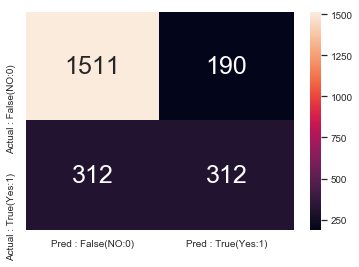



* ROC-AUC curve on Logistics Regression classifier (on test set) 



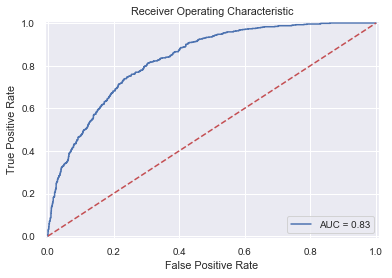

* Precision-Recall curve on Logistics Regression classifier (on test set)



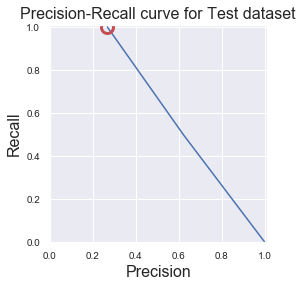

In [60]:
# Predict Target variable (test set)

# 2. Apply values on function " predict_target "
logisticsRegclf_test_pred , logisticsRegclf_test_prob_pred = predict_target(feature_variable_test= X_test ,\
                                                            ml_model= logisticsRegression_model[0])

print("Logistics Regression : Model Evaluation  (on test set)\n")

# 3. Apply values on function " get_model_evaluation_scores "
logisticsRegclf_model_score = get_model_evaluation_scores(actual_target_variable= y_test , \
                                                  predicted_target_variable= logisticsRegclf_test_pred)

print("* Logistics Regression : Evaluation score (on test set)\n\tAccuracy Score: {0}\n\tPrecision Score: {1}\
       \n\tRecall Score: {2}\n\tF1_score: {3}\n\tROC_AUC_score: {4}\n\tLog_Loss_Score: {5}  ".format(
    logisticsRegclf_model_score[0], logisticsRegclf_model_score[1], logisticsRegclf_model_score[2], \
    logisticsRegclf_model_score[3],logisticsRegclf_model_score[4],logisticsRegclf_model_score[5]),"\n")


# Model Classification report (test set)
# 4.  Apply values on function " get_classification_report "
print("* Logistics Regression-Classification Report (on test set)\n",\
    get_classification_report(actual_target_variable= y_test ,\
      predicted_target_variable= logisticsRegclf_test_pred))
print("\n")

# Model's Confusion matrix (test set)
# 5. Apply values on function " get_visual_confusion_matrix "
print("* Logistics Regression-Confusion matrix (on test set)\n")
get_visual_confusion_matrix(actual_target_variable= y_test ,\
       predicted_target_variable= logisticsRegclf_test_pred)
print("\n")

# Model's ROC-AUC curve (test set)
# 6. Apply values on function " plot_roc_auc_curve "
print("* ROC-AUC curve on Logistics Regression classifier (on test set) \n")
plot_roc_auc_curve (actual_target_variable= y_test ,\
      predicted_target_variable= logisticsRegclf_test_prob_pred)

# Model's Precision-Recall curve (test set)
# 7. Apply values on function " plot_precision_recall_curve "
print("* Precision-Recall curve on Logistics Regression classifier (on test set)\n")
plot_precision_recall_curve(actual_target_variable= y_test ,\
      predicted_target_variable= logisticsRegclf_test_pred)

#### 12.3.2 DecisionTree Classifier

###### Selection Of Hyper Paramter for DecisionTree

In [61]:
# Hyper paramter for logistic regression
params_dist = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

# Logistic regression alogorithm
from sklearn.tree import DecisionTreeClassifier
decTreeclf = DecisionTreeClassifier()

# Apply values on function "hyper_param_selection_RandomSearchCV" to get best hyperparameter for model
hyper_params_decTreeclf , best_hyperParam_decTreeclf = hyper_param_selection_RandomSearchCV (ml_algo= decTreeclf , \
                                                        parms_dict= params_dist , no_of_iteration =10 , \
                                                         feature_variable = X_train , target_variable =y_train )

print("Hyper Paramter for DecisionTreeClassifier\n")
report(hyper_params_decTreeclf)

print("Best Hyperparameter for DecisionTreeClassifier")
print(best_hyperParam_decTreeclf)


Hyper Paramter for DecisionTreeClassifier

Model with rank: 1
Mean validation score: 0.799 (std: 0.009)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_depth': 5, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.799 (std: 0.018)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_leaf_nodes': 20, 'max_depth': 5, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.798 (std: 0.016)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_leaf_nodes': 10, 'max_depth': None, 'criterion': 'gini'}

Model with rank: 4
Mean validation score: 0.797 (std: 0.013)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_depth': 5, 'criterion': 'gini'}

Model with rank: 5
Mean validation score: 0.793 (std: 0.014)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_leaf_nodes': 10, 'max_depth': None, 'criterion': 'entropy'}

Model with rank: 5
Mean validati

###### 12.3.2.1 Decision Tree Model

###### **Model Evaluation on Training Set**

In [62]:
# Decision Tree Regression
start_time = time.time()

# Initialize DecisionTree with hyper-parameters

from sklearn.tree import DecisionTreeClassifier

decisionTreeClf = DecisionTreeClassifier(**best_hyperParam_decTreeclf)

# Start timer before model fitting
start_time = time.time() 

# 1. model fitting with LogisticRegression
decisionTree_model = model_fitting(ml_algo= decisionTreeClf , feature_variable_train= X_train ,\
                                   target_variable_train= y_train , cross_validation= 20 )

dummy_time = (time.time() - start_time)

print("DecisionTreeClassifier : Model Evaluation on Training dataset\n")
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time) ,"\n")
print("* ML-Model:", decisionTree_model[0],"\n")
print("* Predicted Values (on training set):", decisionTree_model[1],"\n")
print("* Predicted Probabilities (on training set):", decisionTree_model[2],"\n")
print("* Accuracy (on training set): %s" % decisionTree_model[3],"\n")
print("* Accuracy CV 10-Fold(on training set): %s" % decisionTree_model[4],"\n")
print("* Decision Tree - Classification Report (on training set):\n",\
      get_classification_report(actual_target_variable= y_train , 
      predicted_target_variable= decisionTree_model[1]),"\n")



DecisionTreeClassifier : Model Evaluation on Training dataset

Running Time: 0:00:00.455719 

* ML-Model: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

* Predicted Values (on training set): [0 1 0 ... 0 1 1] 

* Predicted Probabilities (on training set): [0.36929461 0.51256281 0.17283951 ... 0.         0.72340426 0.85294118] 

* Accuracy (on training set): 80.82 

* Accuracy CV 10-Fold(on training set): 79.97 

* Decision Tree - Classification Report (on training set):
               precision    recall  f1-score   support

       No :0       0.87      0.86      0.86      3473
       Yes:1       0.62      0.62      0.62      1245

   micro avg       0.80      0.80      0.80      4718


###### **Model Evaluation on Test Set**

DecisionTreeClassifier : Model Evaluation  (on test set)

* DecisionTree : Evaluation score (on test set)
	Accuracy Score: 0.7759139784946236
	Precision Score: 0.5816164817749604       
	Recall Score: 0.5881410256410257
	F1_score: 0.5848605577689243
	ROC_AUC_score: 0.7164691018857685
	Log_Loss_Score: 7.739747782997867   

* DecisionTree - Classification Report (on test set)
               precision    recall  f1-score   support

       No :0       0.85      0.84      0.85      1701
       Yes:1       0.58      0.59      0.58       624

   micro avg       0.78      0.78      0.78      2325
   macro avg       0.71      0.72      0.72      2325
weighted avg       0.78      0.78      0.78      2325



* DecisionTree - Confusion matrix (on test set)



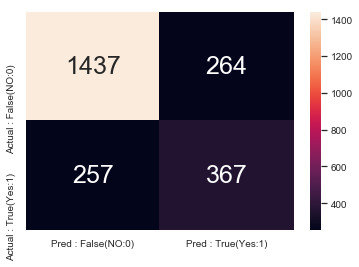



* ROC-AUC curve on DecisionTreeClassifier (on test set) 



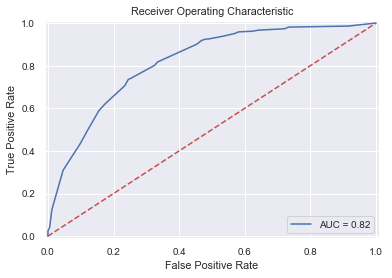

* Precision-Recall curve on DecisionTreeClassifier (on test set)  



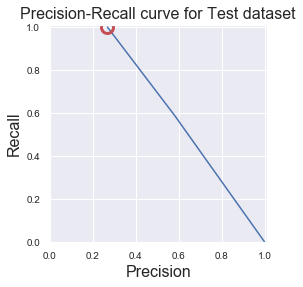

In [63]:
# Predict Target variable (test set)

# 2. Apply values on function " predict_target "
decisionTree_model_test_pred ,decisionTree_model_test_prob_pred  = predict_target(feature_variable_test= X_test ,\
                                              ml_model= decisionTree_model[0])

print("DecisionTreeClassifier : Model Evaluation  (on test set)\n")

# 3. Apply values on function " get_model_evaluation_scores "
decisionTree_model_score = get_model_evaluation_scores(actual_target_variable= y_test , \
                           predicted_target_variable= decisionTree_model_test_pred)

print("* DecisionTree : Evaluation score (on test set)\n\tAccuracy Score: {0}\n\tPrecision Score: {1}\
       \n\tRecall Score: {2}\n\tF1_score: {3}\n\tROC_AUC_score: {4}\n\tLog_Loss_Score: {5}  ".format(
       decisionTree_model_score[0], decisionTree_model_score[1], decisionTree_model_score[2], \
       decisionTree_model_score[3],decisionTree_model_score[4],decisionTree_model_score[5]),"\n")


# Model Classification report (test set)
# 4.  Apply values on function " get_classification_report "
print("* DecisionTree - Classification Report (on test set)\n",\
      get_classification_report(actual_target_variable= y_test , \
      predicted_target_variable= decisionTree_model_test_pred))

print("\n")

# Model's Confusion matrix (test set)
# 5. Apply values on function " get_visual_confusion_matrix "
print("* DecisionTree - Confusion matrix (on test set)\n")
get_visual_confusion_matrix(actual_target_variable= y_test , \
      predicted_target_variable= decisionTree_model_test_pred)

print("\n")

# Model's ROC-AUC curve
# 6. Apply values on function " plot_roc_auc_curve "
print("* ROC-AUC curve on DecisionTreeClassifier (on test set) \n")
plot_roc_auc_curve (actual_target_variable= y_test , \
      predicted_target_variable= decisionTree_model_test_prob_pred)

# Model's ROC-AUC curve
# 7. Apply values on function " plot_roc_auc_curve "
print("* Precision-Recall curve on DecisionTreeClassifier (on test set)  \n")
plot_precision_recall_curve (actual_target_variable= y_test , \
      predicted_target_variable= decisionTree_model_test_pred)

#### 12.3.3 Random Forest Classifier

###### Selection Of Hyper Paramter for RandomForest

In [64]:
# Selection Of Hyper Paramter for RandomForest

# Hyper paramter for logistic regression
params_dist = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [2, 5, 10],
              "min_samples_leaf": [2, 5, 10],
              "max_leaf_nodes": [2, 5, 10, 20],
              "n_estimators":[10,100]
              }

# Logistic regression alogorithm
from sklearn.ensemble import RandomForestClassifier
randomForestclf = RandomForestClassifier()

# Apply values on function "hyper_param_selection_RandomSearchCV" to get best hyperparameter for model
hyper_params_randomForestclf , best_hyperParam_randomForest = hyper_param_selection_RandomSearchCV(ml_algo= randomForestclf ,\
                               parms_dict= params_dist , no_of_iteration =10 ,\
                               feature_variable = X_train , target_variable =y_train   )

print("Hyper Paramter for RandomForestClassifier\n")
report(hyper_params_randomForestclf)

print("Best Hyperparameter for RandomForestClassifier")
print(best_hyperParam_randomForest)

Hyper Paramter for RandomForestClassifier

Model with rank: 1
Mean validation score: 0.800 (std: 0.012)
Parameters: {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_leaf_nodes': 20, 'max_depth': 10, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.797 (std: 0.010)
Parameters: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_leaf_nodes': 10, 'max_depth': 5, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.793 (std: 0.011)
Parameters: {'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_leaf_nodes': 5, 'max_depth': 2, 'criterion': 'entropy'}

Model with rank: 4
Mean validation score: 0.792 (std: 0.012)
Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_leaf_nodes': 5, 'max_depth': 10, 'criterion': 'gini'}

Model with rank: 5
Mean validation score: 0.790 (std: 0.011)
Parameters: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf':

#### 12.3.3.1 Random Forest Classification Model


###### **Model Evaluation on Training Set**

In [65]:
# Random Forest Classification


# Initialize Random Forest Classification with hyper-parameters

from sklearn.ensemble import RandomForestClassifier

randomForestClf = RandomForestClassifier(**best_hyperParam_randomForest)

# Start timer before model fitting
start_time = time.time() 

# 1. model fitting with RandomForestClassifier
randomForest_model = model_fitting(ml_algo= randomForestClf , feature_variable_train= X_train ,\
                                   target_variable_train= y_train , cross_validation= 20 )

dummy_time = (time.time() - start_time)

print("RandomForestClassifier : Model Evaluation on Training dataset\n")
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time) ,"\n")
print("* ML-Model:", randomForest_model[0],"\n")
print("* Predicted Values (on training set):", randomForest_model[1],"\n")
print("* Predicted Probabilities (on training set):", randomForest_model[2],"\n")
print("* Accuracy (on training set): %s" % randomForest_model[3],"\n")
print("* Accuracy CV 10-Fold(on training set): %s" % randomForest_model[4],"\n")
print("* RandomForest - Classification Report (on training set):\n",\
      get_classification_report(actual_target_variable= y_train , \
      predicted_target_variable= randomForest_model[1]),"\n")



RandomForestClassifier : Model Evaluation on Training dataset

Running Time: 0:00:00.996386 

* ML-Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

* Predicted Values (on training set): [0 0 0 ... 0 1 1] 

* Predicted Probabilities (on training set): [0.24466664 0.50588613 0.36120906 ... 0.01561311 0.64598781 0.77303185] 

* Accuracy (on training set): 81.26 

* Accuracy CV 10-Fold(on training set): 80.44 

* RandomForest - Classification Report (on training set):
               precision    recall  f1-score   support

       No :0       0.83      0.92      0.87      3473
       Yes:1       0.69      0.48   

RandomForestClassifier : Model Evaluation  (on test set)

* Random Forest : Evaluation score (on test set)
	Accuracy Score: 0.7879569892473118
	Precision Score: 0.6533957845433255       
	Recall Score: 0.44711538461538464
	F1_score: 0.5309229305423405
	ROC_AUC_score: 0.6800538710260932
	Log_Loss_Score: 7.323757033595973  

* Random Forest - Classification Report (on test set)
               precision    recall  f1-score   support

       No :0       0.82      0.91      0.86      1701
       Yes:1       0.65      0.45      0.53       624

   micro avg       0.79      0.79      0.79      2325
   macro avg       0.74      0.68      0.70      2325
weighted avg       0.77      0.79      0.77      2325



* Random Forest -Confusion matrix (on test set)



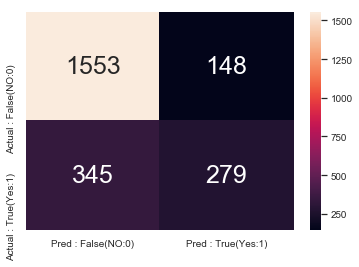



* ROC-AUC curve on RandomForestClassifier (on test set) 



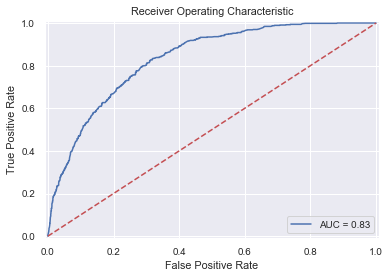

* Precision-Recall curve on RandomForestClassifier (on test set)  



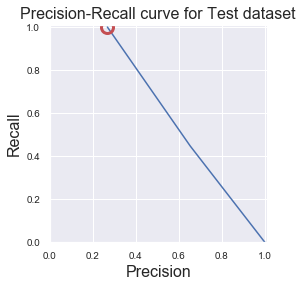

In [66]:
# Predict Target variable (test set)

# 2. Apply values on function " predict_target "
randomForest_model_test_pred , randomForest_model_test_prob_pred = predict_target(feature_variable_test= X_test ,\
                                              ml_model= randomForest_model[0])

print("RandomForestClassifier : Model Evaluation  (on test set)\n")

# 3. Apply values on function " get_model_evaluation_scores "
randomForest_model_score = get_model_evaluation_scores(actual_target_variable= y_test , \
                           predicted_target_variable= randomForest_model_test_pred)

print("* Random Forest : Evaluation score (on test set)\n\tAccuracy Score: {0}\n\tPrecision Score: {1}\
       \n\tRecall Score: {2}\n\tF1_score: {3}\n\tROC_AUC_score: {4}\n\tLog_Loss_Score: {5} ".format(
       randomForest_model_score[0], randomForest_model_score[1], randomForest_model_score[2], \
       randomForest_model_score[3],randomForest_model_score[4],randomForest_model_score[5]),"\n")


# Model Classification report (test set)
# 4.  Apply values on function " get_classification_report "
print("* Random Forest - Classification Report (on test set)\n",\
      get_classification_report(actual_target_variable= y_test , \
      predicted_target_variable= randomForest_model_test_pred))

print("\n")

# Model's Confusion matrix (test set)
# 5. Apply values on function " get_visual_confusion_matrix "
print("* Random Forest -Confusion matrix (on test set)\n")
get_visual_confusion_matrix(actual_target_variable= y_test , \
      predicted_target_variable= randomForest_model_test_pred)

print("\n")

# Model's ROC-AUC curve
# 6. Apply values on function " plot_roc_auc_curve "
print("* ROC-AUC curve on RandomForestClassifier (on test set) \n")
plot_roc_auc_curve (actual_target_variable= y_test , \
      predicted_target_variable= randomForest_model_test_prob_pred)

# Model's ROC-AUC curve
# 7. Apply values on function " plot_roc_auc_curve "
print("* Precision-Recall curve on RandomForestClassifier (on test set)  \n")
plot_precision_recall_curve (actual_target_variable= y_test , \
      predicted_target_variable= randomForest_model_test_pred)

#### 12.4 GradientBoostingClassifier

###### Selection Of Hyper Paramter for GradientBoostingClassifier

In [67]:
# Selection Of Hyper Paramter for GradientBoostingClassifier

# Hyper paramter for GradientBoostingClassifier
params_dist = {"loss": ["deviance", "exponential"],
               "learning_rate" :[0.01, 0.1],
              "max_depth": [2, 5, 10],
              "min_samples_split" :[2,10,20],
              "min_samples_leaf": [2, 5, 10],
              "max_leaf_nodes": [2, 5, 10, 20],
              "n_estimators":[10,100]
              }

# GradientBoostingClassifier alogorithm
from sklearn.ensemble import GradientBoostingClassifier
gradientBoostclf = GradientBoostingClassifier()

# Apply values on function "hyper_param_selection_RandomSearchCV" to get best hyperparameter for model
hyper_params_gradientBoostclf, best_hyperParam_gradientBoostclf = hyper_param_selection_RandomSearchCV(ml_algo= gradientBoostclf ,\
                               parms_dict= params_dist , no_of_iteration =10 ,\
                               feature_variable = X_train , target_variable =y_train   )

print("Hyper Paramter for GradientBoostingClassifier\n")
report(hyper_params_gradientBoostclf)

print("Best Hyperparameter for GradientBoostingClassifier")
print(best_hyperParam_gradientBoostclf)

Hyper Paramter for GradientBoostingClassifier

Model with rank: 1
Mean validation score: 0.805 (std: 0.011)
Parameters: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_leaf_nodes': 5, 'max_depth': 5, 'loss': 'exponential', 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: 0.805 (std: 0.010)
Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_depth': 2, 'loss': 'exponential', 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: 0.805 (std: 0.009)
Parameters: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_leaf_nodes': 2, 'max_depth': 2, 'loss': 'deviance', 'learning_rate': 0.1}

Model with rank: 4
Mean validation score: 0.804 (std: 0.006)
Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 2, 'max_depth': 2, 'loss': 'exponential', 'learning_rate': 0.1}

Model with rank: 5
Mean validation score: 0.791 (std

##### 12.4.1 GradientBoostingClassifier Model


###### **Model Evaluation on Training Set**

In [68]:
# GradientBoostingClassifier  Classification


# Initialize GradientBoostingClassifier  with hyper-parameters

from sklearn.ensemble import GradientBoostingClassifier

gradientBoostClf = GradientBoostingClassifier(**best_hyperParam_gradientBoostclf)

# Start timer before model fitting
start_time = time.time() 

# 1. model fitting with Random Forest Classifier
gradientBoostClf_model = model_fitting(ml_algo= gradientBoostClf , feature_variable_train= X_train ,\
                                   target_variable_train= y_train , cross_validation= 20 )

dummy_time = (time.time() - start_time)

print("GradientBoostingClassifier - Model Evaluation on Training dataset\n")
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time) ,"\n")
print("* ML-Model:", gradientBoostClf_model[0],"\n")
print("* Predicted Values (on training set):", gradientBoostClf_model[1],"\n")
print("* Predicted Probabilities (on training set):", gradientBoostClf_model[2],"\n")
print("* Accuracy (on training set): %s" % gradientBoostClf_model[3],"\n")
print("* Accuracy CV 10-Fold(on training set): %s" % gradientBoostClf_model[4],"\n")
print("* GradientBoostingClassifier  - Classification Report (on training set):\n",\
      get_classification_report(actual_target_variable= y_train , \
      predicted_target_variable= gradientBoostClf_model[1]),"\n")

GradientBoostingClassifier - Model Evaluation on Training dataset

Running Time: 0:00:10.057800 

* ML-Model: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=5,
              max_features=None, max_leaf_nodes=5,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=20,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False) 

* Predicted Values (on training set): [0 1 0 ... 0 1 1] 

* Predicted Probabilities (on training set): [0.38109967 0.61724741 0.19648421 ... 0.00914905 0.6927123  0.77488132] 

* Accuracy (on training set): 82.87 

* Accuracy CV 10-Fold(on training set): 81.05 

* GradientBoostingClassifier  - Classification Report (on training set):
     

###### **Model Evaluation on Test Set**

GradientBoostingClassifier : Model Evaluation  (on test set)

* GradientBoosting Classifier : Evaluation score (on test set)
	Accuracy Score: 0.7870967741935484
	Precision Score: 0.6223908918406073       
	Recall Score: 0.5256410256410257
	F1_score: 0.5699391833188532
	ROC_AUC_score: 0.7043255098810653
	Log_Loss_Score: 7.353485348545978  

* GradientBoosting Classifier - Classification Report (on test set)
               precision    recall  f1-score   support

       No :0       0.84      0.88      0.86      1701
       Yes:1       0.62      0.53      0.57       624

   micro avg       0.79      0.79      0.79      2325
   macro avg       0.73      0.70      0.71      2325
weighted avg       0.78      0.79      0.78      2325



* GradientBoosting Classifier -Confusion matrix (on test set)



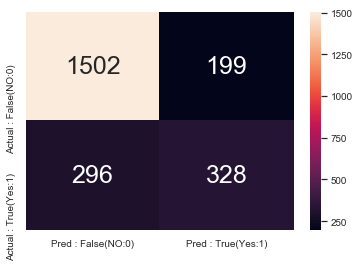



* ROC-AUC curve on GradientBoosting Classifier (on test set) 



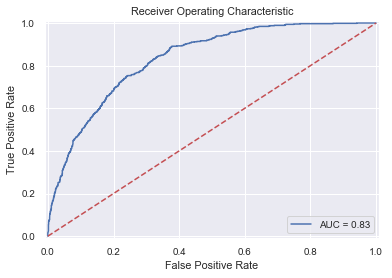

* Precision-Recall curve on GradientBoosting Classifier (on test set)  



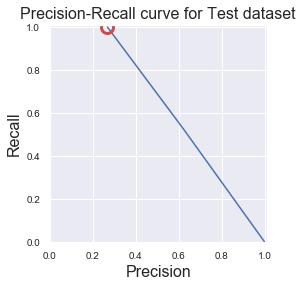

In [69]:
# Predict Target variable (test set)

# 2. Apply values on function " predict_target "
gradientBoostClf_model_test_pred , gradientBoostClf_model_test_prob_pred = predict_target(feature_variable_test= X_test ,\
                                              ml_model= gradientBoostClf_model[0])

print("GradientBoostingClassifier : Model Evaluation  (on test set)\n")

# 3. Apply values on function " get_model_evaluation_scores "
gradientBoostClf_model_score = get_model_evaluation_scores(actual_target_variable= y_test , \
                           predicted_target_variable= gradientBoostClf_model_test_pred)

print("* GradientBoosting Classifier : Evaluation score (on test set)\n\tAccuracy Score: {0}\n\tPrecision Score: {1}\
       \n\tRecall Score: {2}\n\tF1_score: {3}\n\tROC_AUC_score: {4}\n\tLog_Loss_Score: {5} ".format(
       gradientBoostClf_model_score[0], gradientBoostClf_model_score[1], gradientBoostClf_model_score[2], \
       gradientBoostClf_model_score[3],gradientBoostClf_model_score[4],gradientBoostClf_model_score[5]),"\n")


# Model Classification report (test set)
# 4.  Apply values on function " get_classification_report "
print("* GradientBoosting Classifier - Classification Report (on test set)\n",\
      get_classification_report(actual_target_variable= y_test , \
      predicted_target_variable= gradientBoostClf_model_test_pred))

print("\n")

# Model's Confusion matrix (test set)
# 5. Apply values on function " get_visual_confusion_matrix "
print("* GradientBoosting Classifier -Confusion matrix (on test set)\n")
get_visual_confusion_matrix(actual_target_variable= y_test , \
      predicted_target_variable= gradientBoostClf_model_test_pred)

print("\n")

# Model's ROC-AUC curve
# 6. Apply values on function " plot_roc_auc_curve "
print("* ROC-AUC curve on GradientBoosting Classifier (on test set) \n")
plot_roc_auc_curve (actual_target_variable= y_test , \
      predicted_target_variable= gradientBoostClf_model_test_prob_pred)

# Model's ROC-AUC curve
# 7. Apply values on function " plot_roc_auc_curve "
print("* Precision-Recall curve on GradientBoosting Classifier (on test set)  \n")
plot_precision_recall_curve (actual_target_variable= y_test , \
      predicted_target_variable= gradientBoostClf_model_test_pred)

#### 12.5 KNeighborclassifier

###### Selection Of Hyper Paramter for KNeighborclassifier

In [70]:
# Selection Of Hyper Paramter for GradientBoostingClassifier

# Hyper paramter for KNeighborsClassifier
params_dist = {"n_neighbors": [5,8,10],
               "leaf_size" :[30,60]                                     
               }

# KNeighborsClassifier alogorithm
from sklearn.neighbors import KNeighborsClassifier
kNeighborsclf = KNeighborsClassifier()

# Apply values on function
hyper_params_kNeighborsclf ,best_hyperParam_kNeighborsclf = hyper_param_selection_RandomSearchCV(ml_algo= kNeighborsclf ,\
                               parms_dict= params_dist , no_of_iteration =20 ,\
                               feature_variable = X_train , target_variable =y_train   )

print("Hyper Paramter for KNeighborsClassifier\n")
report(hyper_params_kNeighborsclf)

print("Best Hyperparameter for KNeighborsClassifier")
print(best_hyperParam_kNeighborsclf)

Hyper Paramter for KNeighborsClassifier

Model with rank: 1
Mean validation score: 0.789 (std: 0.010)
Parameters: {'n_neighbors': 8, 'leaf_size': 30}

Model with rank: 1
Mean validation score: 0.789 (std: 0.010)
Parameters: {'n_neighbors': 8, 'leaf_size': 60}

Model with rank: 3
Mean validation score: 0.786 (std: 0.011)
Parameters: {'n_neighbors': 10, 'leaf_size': 30}

Model with rank: 3
Mean validation score: 0.786 (std: 0.011)
Parameters: {'n_neighbors': 10, 'leaf_size': 60}

Model with rank: 5
Mean validation score: 0.776 (std: 0.008)
Parameters: {'n_neighbors': 5, 'leaf_size': 30}

Model with rank: 5
Mean validation score: 0.776 (std: 0.008)
Parameters: {'n_neighbors': 5, 'leaf_size': 60}

Best Hyperparameter for KNeighborsClassifier
{'n_neighbors': 8, 'leaf_size': 30}


##### 12.5.1 KNeighborclassifier Model


###### **Model Evaluation on Training Set**

In [71]:
# KNeighborsClassifier  Classification


# Initialize KNeighborsClassifier  with hyper-parameters

from sklearn.neighbors import KNeighborsClassifier

Parameters= { 'weights':'distance', 'algorithm': 'brute', 'p': 2, 'n_jobs': -1, **best_hyperParam_kNeighborsclf}

kNeighborClf = KNeighborsClassifier(**Parameters)

# Start timer before model fitting
start_time = time.time() 

# 1. model fitting with KNeighborsClassifier
kNeighborClf_model = model_fitting(ml_algo= kNeighborClf , feature_variable_train= X_train ,\
                                   target_variable_train= y_train , cross_validation= 20 )

dummy_time = (time.time() - start_time)

print("KNeighborsClassifier - Model Evaluation on Training dataset\n")
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time) ,"\n")
print("* ML-Model:", kNeighborClf_model[0],"\n")
print("* Predicted Values (on training set):", kNeighborClf_model[1],"\n")
print("* Predicted Probabilities (on training set):", kNeighborClf_model[2],"\n")
print("* Accuracy (on training set): %s" % kNeighborClf_model[3],"\n")
print("* Accuracy CV 10-Fold(on training set): %s" % kNeighborClf_model[4],"\n")
print("* KNeighborsClassifier  - Classification Report (on training set):\n",\
      get_classification_report(actual_target_variable= y_train , \
      predicted_target_variable= kNeighborClf_model[1]),"\n")


KNeighborsClassifier - Model Evaluation on Training dataset

Running Time: 0:00:11.844353 

* ML-Model: KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='distance') 

* Predicted Values (on training set): [0 1 1 ... 0 1 1] 

* Predicted Probabilities (on training set): [0. 0. 0. ... 0. 1. 1.] 

* Accuracy (on training set): 99.77 

* Accuracy CV 10-Fold(on training set): 77.28 

* KNeighborsClassifier  - Classification Report (on training set):
               precision    recall  f1-score   support

       No :0       0.83      0.86      0.85      3473
       Yes:1       0.58      0.52      0.55      1245

   micro avg       0.77      0.77      0.77      4718
   macro avg       0.71      0.69      0.70      4718
weighted avg       0.77      0.77      0.77      4718
 



###### **Model Evaluation on Test Set**

KNeighborsClassifier : Model Evaluation  (on test set)

KNeighborsClassifier : Evaluation score (on test set)
	Accuracy Score: 0.7612903225806451
	Precision Score: 0.56       
	Recall Score: 0.5160256410256411
	F1_score: 0.5371142618849042
	ROC_AUC_score: 0.6836448017003572
	Log_Loss_Score: 8.244827181645277  

KNeighborsClassifier - Classification Report (on test set)
               precision    recall  f1-score   support

       No :0       0.83      0.85      0.84      1701
       Yes:1       0.56      0.52      0.54       624

   micro avg       0.76      0.76      0.76      2325
   macro avg       0.69      0.68      0.69      2325
weighted avg       0.76      0.76      0.76      2325



KNeighborsClassifier -Confusion matrix (on test set)



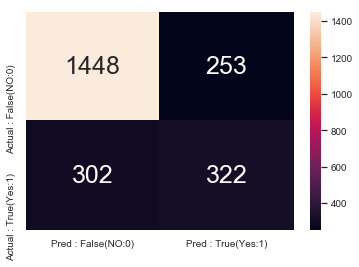



ROC-AUC curve on KNeighborsClassifier (on test set) 



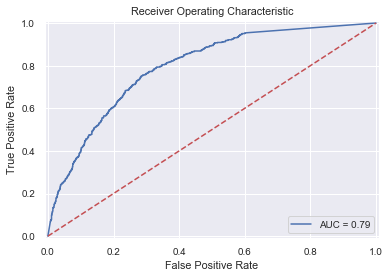

Precision-Recall curve on KNeighborsClassifier (on test set)  



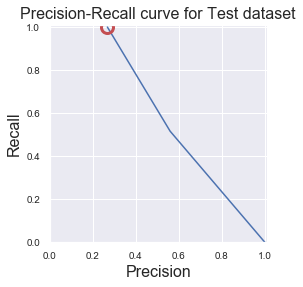

In [72]:
# Predict Target variable (test set)

# 2. Apply values on function " predict_target "
kNeighborClf_model_test_pred , kNeighborClf_model_test_prob_pred = predict_target(feature_variable_test= X_test ,\
                                              ml_model= kNeighborClf_model[0])

print("KNeighborsClassifier : Model Evaluation  (on test set)\n")

# 3. Apply values on function " get_model_evaluation_scores "
kNeighborClf_model_score = get_model_evaluation_scores(actual_target_variable= y_test , \
                           predicted_target_variable= kNeighborClf_model_test_pred)

print("KNeighborsClassifier : Evaluation score (on test set)\n\tAccuracy Score: {0}\n\tPrecision Score: {1}\
       \n\tRecall Score: {2}\n\tF1_score: {3}\n\tROC_AUC_score: {4}\n\tLog_Loss_Score: {5} ".format(
       kNeighborClf_model_score[0], kNeighborClf_model_score[1], kNeighborClf_model_score[2], \
       kNeighborClf_model_score[3],kNeighborClf_model_score[4],kNeighborClf_model_score[5]),"\n")


# Model Classification report (test set)
# 4.  Apply values on function " get_classification_report "
print("KNeighborsClassifier - Classification Report (on test set)\n",\
      get_classification_report(actual_target_variable= y_test , \
      predicted_target_variable= kNeighborClf_model_test_pred))

print("\n")

# Model's Confusion matrix (test set)
# 5. Apply values on function " get_visual_confusion_matrix "
print("KNeighborsClassifier -Confusion matrix (on test set)\n")
get_visual_confusion_matrix(actual_target_variable= y_test , \
      predicted_target_variable= kNeighborClf_model_test_pred)

print("\n")

# Model's ROC-AUC curve
# 6. Apply values on function " plot_roc_auc_curve "
print("ROC-AUC curve on KNeighborsClassifier (on test set) \n")
plot_roc_auc_curve (actual_target_variable= y_test , \
      predicted_target_variable= kNeighborClf_model_test_prob_pred)

# Model's ROC-AUC curve
# 7. Apply values on function " plot_roc_auc_curve "
print("Precision-Recall curve on KNeighborsClassifier (on test set)  \n")
plot_precision_recall_curve (actual_target_variable= y_test , \
      predicted_target_variable= kNeighborClf_model_test_pred)

#### 12.6 GaussianNB



##### 12.6.1 GaussianNB Classifier Model


###### **Model Evaluation on Training Set**

In [73]:
# GaussianNB Classifier  Classification


# Initialize GaussianNB Classifier  with hyper-parameters

from sklearn.naive_bayes import GaussianNB

#Parameters= {'priors': None, 'var_smoothing': 1e-09}

#gaussianNBClf = GaussianNB(**Parameters)
gaussianNBClf = GaussianNB()

# Start timer before model fitting
start_time = time.time() 

# 1. model fitting with GaussianNB Classifier
gaussianNBClf_model = model_fitting(ml_algo= gaussianNBClf , feature_variable_train= X_train ,\
                                   target_variable_train= y_train , cross_validation= 20 )

dummy_time = (time.time() - start_time)

print("GaussianNB Classifier - Model Evaluation on Training dataset\n")
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time) ,"\n")
print("* ML-Model:", gaussianNBClf_model[0],"\n")
print("* Predicted Values (on training set):", gaussianNBClf_model[1],"\n")
print("* Predicted Probabilities (on training set):", gaussianNBClf_model[2],"\n")
print("* Accuracy (on training set): %s" % gaussianNBClf_model[3],"\n")
print("* Accuracy CV 10-Fold(on training set): %s" % gaussianNBClf_model[4],"\n")
print("* GaussianNB Classifier  - Classification Report (on training set):\n",\
      get_classification_report(actual_target_variable= y_train , \
      predicted_target_variable= gaussianNBClf_model[1]),"\n")

GaussianNB Classifier - Model Evaluation on Training dataset

Running Time: 0:00:00.630314 

* ML-Model: GaussianNB(priors=None, var_smoothing=1e-09) 

* Predicted Values (on training set): [0 1 0 ... 0 1 1] 

* Predicted Probabilities (on training set): [1.09852423e-03 9.85500837e-01 2.81700188e-01 ... 2.20132107e-18
 9.99874116e-01 9.99979698e-01] 

* Accuracy (on training set): 75.29 

* Accuracy CV 10-Fold(on training set): 75.18 

* GaussianNB Classifier  - Classification Report (on training set):
               precision    recall  f1-score   support

       No :0       0.91      0.74      0.81      3473
       Yes:1       0.52      0.79      0.63      1245

   micro avg       0.75      0.75      0.75      4718
   macro avg       0.71      0.76      0.72      4718
weighted avg       0.81      0.75      0.76      4718
 



###### **Model Evaluation on Test Set**

GaussianNB Classifier : Model Evaluation  (on test set)

GaussianNB Classifier : Evaluation score (on test set)
	Accuracy Score: 0.7290322580645161
	Precision Score: 0.4969512195121951       
	Recall Score: 0.7836538461538461
	F1_score: 0.6082089552238806
	ROC_AUC_score: 0.7463242775742777
	Log_Loss_Score: 9.359064485815777  

GaussianNB Classifier - Classification Report (on test set)
               precision    recall  f1-score   support

       No :0       0.90      0.71      0.79      1701
       Yes:1       0.50      0.78      0.61       624

   micro avg       0.73      0.73      0.73      2325
   macro avg       0.70      0.75      0.70      2325
weighted avg       0.79      0.73      0.74      2325



GaussianNB Classifier -Confusion matrix (on test set)



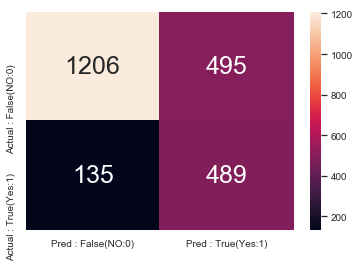



ROC-AUC curve on GaussianNB Classifier (on test set) 



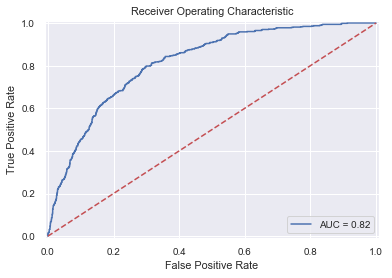

Precision-Recall curve on GaussianNB Classifier (on test set)  



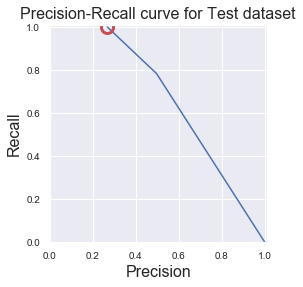

In [74]:
# Predict Target variable (test set)

# 2. Apply values on function " predict_target "
gaussianNBClf_model_test_pred , gaussianNBClf_model_test_prob_pred = predict_target(feature_variable_test= X_test ,\
                                              ml_model= gaussianNBClf_model[0])

print("GaussianNB Classifier : Model Evaluation  (on test set)\n")

# 3. Apply values on function " get_model_evaluation_scores "
gaussianNBClf_model_score = get_model_evaluation_scores(actual_target_variable= y_test , \
                           predicted_target_variable= gaussianNBClf_model_test_pred)

print("GaussianNB Classifier : Evaluation score (on test set)\n\tAccuracy Score: {0}\n\tPrecision Score: {1}\
       \n\tRecall Score: {2}\n\tF1_score: {3}\n\tROC_AUC_score: {4}\n\tLog_Loss_Score: {5} ".format(
       gaussianNBClf_model_score[0], gaussianNBClf_model_score[1], gaussianNBClf_model_score[2], \
       gaussianNBClf_model_score[3],gaussianNBClf_model_score[4],gaussianNBClf_model_score[5]),"\n")


# Model Classification report (test set)
# 4.  Apply values on function " get_classification_report "
print("GaussianNB Classifier - Classification Report (on test set)\n",\
      get_classification_report(actual_target_variable= y_test , \
      predicted_target_variable= gaussianNBClf_model_test_pred))

print("\n")

# Model's Confusion matrix (test set)
# 5. Apply values on function " get_visual_confusion_matrix "
print("GaussianNB Classifier -Confusion matrix (on test set)\n")
get_visual_confusion_matrix(actual_target_variable= y_test , \
      predicted_target_variable= gaussianNBClf_model_test_pred)

print("\n")

# Model's ROC-AUC curve
# 6. Apply values on function " plot_roc_auc_curve "
print("ROC-AUC curve on GaussianNB Classifier (on test set) \n")
plot_roc_auc_curve (actual_target_variable= y_test , \
      predicted_target_variable= gaussianNBClf_model_test_prob_pred)

# Model's ROC-AUC curve
# 7. Apply values on function " plot_roc_auc_curve "
print("Precision-Recall curve on GaussianNB Classifier (on test set)  \n")
plot_precision_recall_curve (actual_target_variable= y_test , \
      predicted_target_variable= gaussianNBClf_model_test_pred)

#### 12.7 XGBoostClassifier



##### 12.7.1 XGBoostClassifier Model


###### **Model Evaluation on Training Set**

In [75]:
# XGBoostClassifier Classifier  Classification


# Initialize XGBoostClassifier  with hyper-parameters

from xgboost import XGBClassifier

# Hyper parameter for XGBClassifier
Param_dist = { 'booster':'gbtree',
               'verbosity':0,
               'max_depth':40,
               'learning_rate':0.2,
               'gamma':0.9,
               'subsample':0.9,
               'eval_metric':'error',
               'n_estimators':400,
               'colsample_bytree':1,
               'objective':'binary:logistic',
               'silent':True,
               'nthread':-1,
               'scale_pos_weight':1
             }


xgBoostClf = XGBClassifier(**Param_dist)

# Start timer before model fitting
start_time = time.time() 

# 1. model fitting with XGBClassifier
xgBoostClf_model = model_fitting(ml_algo= xgBoostClf , feature_variable_train= X_train ,\
                                   target_variable_train= y_train , cross_validation= 20 )

dummy_time = (time.time() - start_time)

print("XGBoostClassifier - Model Evaluation on Training dataset\n")
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time) ,"\n")
print("* ML-Model:", xgBoostClf_model[0],"\n")
print("* Predicted Values (on training set):", xgBoostClf_model[1],"\n")
print("* Predicted Probabilities (on training set):", xgBoostClf_model[2],"\n")
print("* Accuracy (on training set): %s" % xgBoostClf_model[3],"\n")
print("* Accuracy CV 10-Fold(on training set): %s" % xgBoostClf_model[4],"\n")
print("* XGBoostClassifier  - Classification Report (on training set):\n",\
      get_classification_report(actual_target_variable= y_train , \
      predicted_target_variable= xgBoostClf_model[1]),"\n")

XGBoostClassifier - Model Evaluation on Training dataset

Running Time: 0:04:44.170782 

* ML-Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='error', gamma=0.9,
       learning_rate=0.2, max_delta_step=0, max_depth=40,
       min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
       nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9, verbosity=0) 

* Predicted Values (on training set): [0 1 0 ... 0 1 1] 

* Predicted Probabilities (on training set): [4.35406305e-02 2.75124848e-01 1.08111896e-01 ... 7.38501374e-04
 9.18952465e-01 9.91299927e-01] 

* Accuracy (on training set): 99.64 

* Accuracy CV 10-Fold(on training set): 78.0 

* XGBoostClassifier  - Classification Report (on training set):
               precision    recall  f1-score   support

       No :0       0.83      0.88      0.85      3473
    

###### **Model Evaluation on Test Set**

XGBoost Classifier : Model Evaluation  (on test set)

XGBoost Classifier : Evaluation score (on test set)
	Accuracy Score: 0.7703225806451612
	Precision Score: 0.5806451612903226       
	Recall Score: 0.5192307692307693
	F1_score: 0.5482233502538072
	ROC_AUC_score: 0.6908323158323157
	Log_Loss_Score: 7.932857505669234  

XGBoost Classifier - Classification Report (on test set)
               precision    recall  f1-score   support

       No :0       0.83      0.86      0.85      1701
       Yes:1       0.58      0.52      0.55       624

   micro avg       0.77      0.77      0.77      2325
   macro avg       0.71      0.69      0.70      2325
weighted avg       0.76      0.77      0.77      2325



XGBoost Classifier -Confusion matrix (on test set)



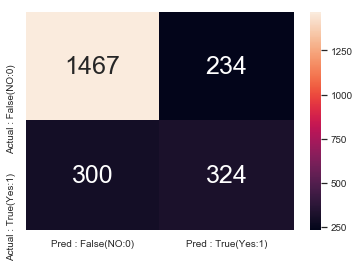



ROC-AUC curve on XGBoost Classifier (on test set) 



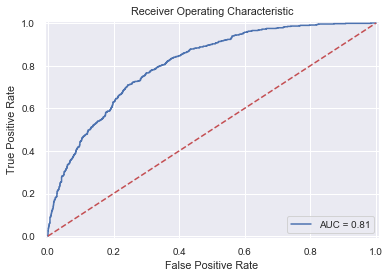

Precision-Recall curve on XGBoost Classifier (on test set)  



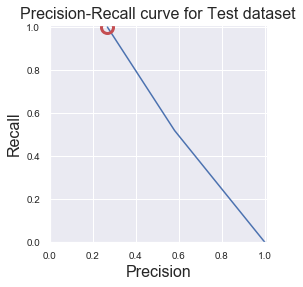

In [76]:
# Predict Target variable (test set)

# 2. Apply values on function " predict_target " and target probabilities
xgBoostClf_model_test_pred , xgBoostClf_model_test_prob_pred = predict_target(feature_variable_test= X_test ,\
                                              ml_model= xgBoostClf_model[0])

print("XGBoost Classifier : Model Evaluation  (on test set)\n")

# 3. Apply values on function " get_model_evaluation_scores "
xgBoostClf_model_score = get_model_evaluation_scores(actual_target_variable= y_test , \
                           predicted_target_variable= xgBoostClf_model_test_pred)

print("XGBoost Classifier : Evaluation score (on test set)\n\tAccuracy Score: {0}\n\tPrecision Score: {1}\
       \n\tRecall Score: {2}\n\tF1_score: {3}\n\tROC_AUC_score: {4}\n\tLog_Loss_Score: {5} ".format(
       xgBoostClf_model_score[0], xgBoostClf_model_score[1], xgBoostClf_model_score[2], \
       xgBoostClf_model_score[3],xgBoostClf_model_score[4],xgBoostClf_model_score[5]),"\n")


# Model Classification report (test set)
# 4.  Apply values on function " get_classification_report "
print("XGBoost Classifier - Classification Report (on test set)\n",\
      get_classification_report(actual_target_variable= y_test , \
      predicted_target_variable= xgBoostClf_model_test_pred))

print("\n")

# Model's Confusion matrix (test set)
# 5. Apply values on function " get_visual_confusion_matrix "
print("XGBoost Classifier -Confusion matrix (on test set)\n")
get_visual_confusion_matrix(actual_target_variable= y_test , \
      predicted_target_variable= xgBoostClf_model_test_pred)

print("\n")

# Model's ROC-AUC curve
# 6. Apply values on function " plot_roc_auc_curve "
print("ROC-AUC curve on XGBoost Classifier (on test set) \n")
plot_roc_auc_curve (actual_target_variable= y_test , \
      predicted_target_variable= xgBoostClf_model_test_prob_pred)

# Model's ROC-AUC curve
# 7. Apply values on function " plot_roc_auc_curve "
print("Precision-Recall curve on XGBoost Classifier (on test set)  \n")
plot_precision_recall_curve (actual_target_variable= y_test , \
      predicted_target_variable= xgBoostClf_model_test_pred)

###### Feature Importance ratio ( through xgboost classifier)

In [77]:
# Create Temporary dataframe for feature and their importance ratio

df_Feature_importance =pd.DataFrame(list(zip(X_test.columns, np.round(xgBoostClf.feature_importances_,3))),columns=['Feature','Importance_ratio'])
df_Feature_importance.sort_values(by='Importance_ratio', ascending=False , inplace=True)
df_Feature_importance

,Feature,Importance_ratio
30,TotalCharges,0.316
29,MonthlyCharges,0.316
28,tenure,0.099
0,gender,0.027
12,PaperlessBilling,0.023
2,Partner,0.020
7,OnlineBackup,0.016
3,Dependents,0.015
1,SeniorCitizen,0.014
21,PaymentMethod_Electronic check,0.014


In [78]:
# Select features whose importance ration is more than or equal to 1.2% or 0.012

df_Feature_importance =df_Feature_importance[df_Feature_importance.Importance_ratio>=0.012]
df_Feature_importance

,Feature,Importance_ratio
30,TotalCharges,0.316
29,MonthlyCharges,0.316
28,tenure,0.099
0,gender,0.027
12,PaperlessBilling,0.023
2,Partner,0.020
7,OnlineBackup,0.016
3,Dependents,0.015
1,SeniorCitizen,0.014
21,PaymentMethod_Electronic check,0.014


AxesSubplot(0.125,0.125;0.775x0.755)


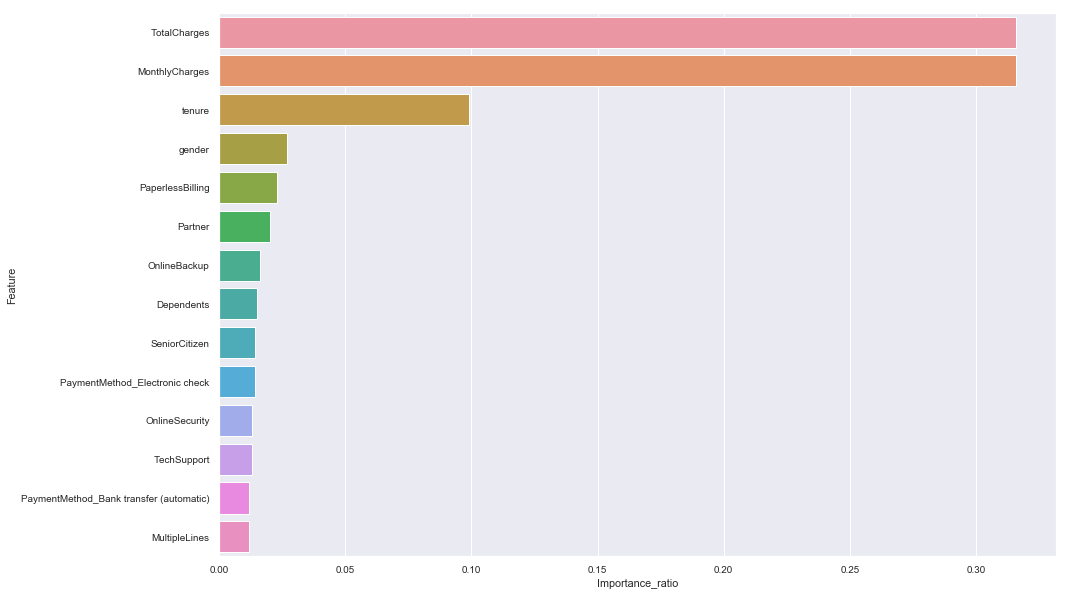

In [79]:
# Visual analysis of important features


def plot_feature_importance(df_feature):
    '''This function plot feature importance ratio'''
    plt.figure(figsize=(15,10))    
    print(sns.barplot(x=df_Feature_importance.iloc[:,1],y=df_Feature_importance.iloc[:,0]))
    plt.show()


# Apply values on function

plot_feature_importance(df_Feature_importance)

#### 13. Classification Model Comparison 


Let's comapare different classification model based upon their evaluation score performed on test dataset.

In [80]:
print("Based on : Test Dataset\n")
# Model Evaluation score based on test set
model_scores =[logisticsRegclf_model_score,decisionTree_model_score , randomForest_model_score,\
             gradientBoostClf_model_score,kNeighborClf_model_score,  gaussianNBClf_model_score , xgBoostClf_model_score]
# Model scores ( columns for dataframe)            
score_list = ['Test-Accuracy_score','Test-Precision_score' , 'Test-Recall_score' ,'Test-F1_score' , 'Test-ROC_AUC_score' ,'Test-Log_loss_score']
# Model scores ( row for dataframe)
clf_Models = ['Logistics Regression','DecisionTree Classification','RandomForest Classifiaction','GradientBoosting','KNeighbor Classifiaction','GaussianNB Classifiaction','XGBoost Classifiaction']

# temp list to store model scores
eval_score=[]
# iterate model scores
for  i, score in list(enumerate(model_scores)):
    eval_score.append(score)
    
# Temporary dataframe for classification model scores
df_Evaluation_Score = pd.DataFrame(data=eval_score,index=clf_Models, columns=score_list)

df_Evaluation_Score

Based on : Test Dataset



,Test-Accuracy_score,Test-Precision_score,Test-Recall_score,Test-F1_score,Test-ROC_AUC_score,Test-Log_loss_score
Logistics Regression,0.784086,0.621514,0.500000,0.554174,0.694150,7.457470
DecisionTree Classification,0.775914,0.581616,0.588141,0.584861,0.716469,7.739748
RandomForest Classifiaction,0.787957,0.653396,0.447115,0.530923,0.680054,7.323757
GradientBoosting,0.787097,0.622391,0.525641,0.569939,0.704326,7.353485
KNeighbor Classifiaction,0.761290,0.560000,0.516026,0.537114,0.683645,8.244827
GaussianNB Classifiaction,0.729032,0.496951,0.783654,0.608209,0.746324,9.359064
XGBoost Classifiaction,0.770323,0.580645,0.519231,0.548223,0.690832,7.932858


In [81]:
# Function to compare Classification Model's performance through ROC_AUC Curve ( based on test set)

colors_name = ['blue','red','green','yellow','cyan','magenta','black']

predict_target = [logisticsRegclf_test_prob_pred , decisionTree_model_test_prob_pred , randomForest_model_test_prob_pred,\
                 gradientBoostClf_model_test_prob_pred,kNeighborClf_model_test_prob_pred,\
                 gaussianNBClf_model_test_prob_pred, xgBoostClf_model_test_prob_pred ]



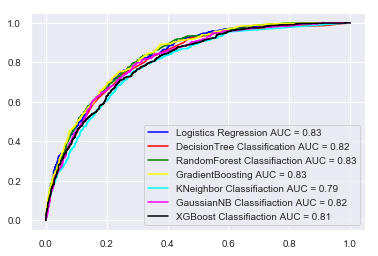

<Figure size 1080x720 with 0 Axes>

In [82]:
# Model's comparison based on ROC curve

def plot_roc_curve(actual_traget , predict_target, colors , model):
    '''This function return AUC score and ROC-AUC curve between actual target and target's probability value '''
    from sklearn.metrics import roc_curve , auc    
    fpr, tpr, threshold = roc_curve(actual_traget, predict_target)
    auc_score= auc(fpr,tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % auc_score, color=colors[i])
    plt.legend(loc = 'lower right')
    
  
 # Loop to iterate classification model, for plotting ROC curve 
for i, model in list(enumerate(clf_Models)):
    plot_roc_curve(actual_traget=y_test,predict_target= predict_target[i], model= clf_Models[i] , colors=colors_name)
    
plt.figure(figsize=(15,10))
plt.show()

#### 14. Model Interpreation and Conclusion

* Based on above analysis we can predict that , with the  RandomForest Classifiaction	algorithm ( test accuracy : 78.7 % and Log-loss ratio :7.32) , we can classify Churn rate for organization.

* Also feature like Total Charges, Monthly Chanrges, Tenure  & gender play vital role in Churn rate whether customers want to retain the services with organization or want to leave the company services.